In [ ]:
cd .. 

In [ ]:
ls DATA/pkl

In [130]:
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import itertools
from IPython.core.display import HTML
STYLE='bmh'
plt.style.use(STYLE)
%load_ext autoreload
%autoreload 2
%matplotlib inline

font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7
colours = [x['color'] for x in list(plt.style.library[STYLE]['axes.prop_cycle'])]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
def top_k(C, k):
    return C["OCCUR"].sort_values(ascending=False)[:k]

def top_k_cooc(C, w, k, normalize=False):
    #first item is the counter token
    t = C[w].sort_values(ascending=False)[1:k+1]
    if normalize:
        t /= t.sum()
        t = t.round(3)
    return t

def get_coos(C, words):
    return C.loc[words, words]



In [91]:
DATA_PATH="DATA/pkl/wellness.zip"
K=10
target_word = "#wellness"
C = pd.read_pickle(DATA_PATH)
C

,OCCUR,#youth,#senior,#diet,#weightloss,#vitamin,#workout,#itsallgoodelpaso,#massage,#elpaso,...,#pitapit,#lifesty,#inhome,#makemoney,#fitfriday,#100daysofgratitude,#washingtondc,#todaysread,#addictiontreatment,#addictionr
OCCUR,0,36,18,1309,1152,32,1426,63,520,63,...,1,1,1,2,1,2,2,1,1,1
#youth,36,0,18,18,18,18,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#senior,18,18,0,18,18,18,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#diet,1309,18,18,0,3,18,140,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#weightloss,1152,18,18,3,0,18,488,0,1,0,...,0,0,0,0,0,0,0,0,0,0
#vitamin,32,18,18,18,18,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#workout,1426,18,18,140,488,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#itsallgoodelpaso,63,0,0,0,0,0,0,0,63,63,...,0,0,0,0,0,0,0,0,0,0
#massage,520,0,0,0,1,0,0,63,0,63,...,0,0,0,0,0,0,0,0,0,0
#elpaso,63,0,0,0,0,0,0,63,63,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0.98, 'Top 10 Hashtag Frequency')

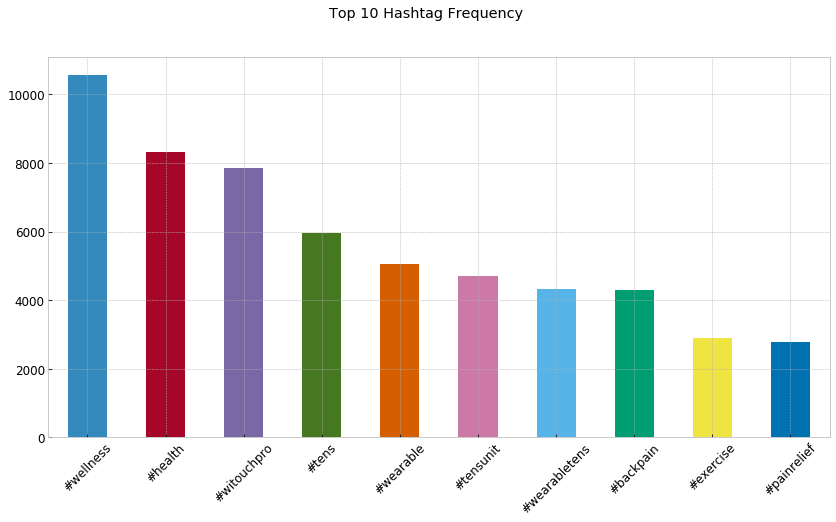

In [92]:
oc = top_k(C, K)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
oc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("Top {} Hashtag Frequency".format(K))

Text(0.5, 0.98, '#wellness: top 10 coocurrences')

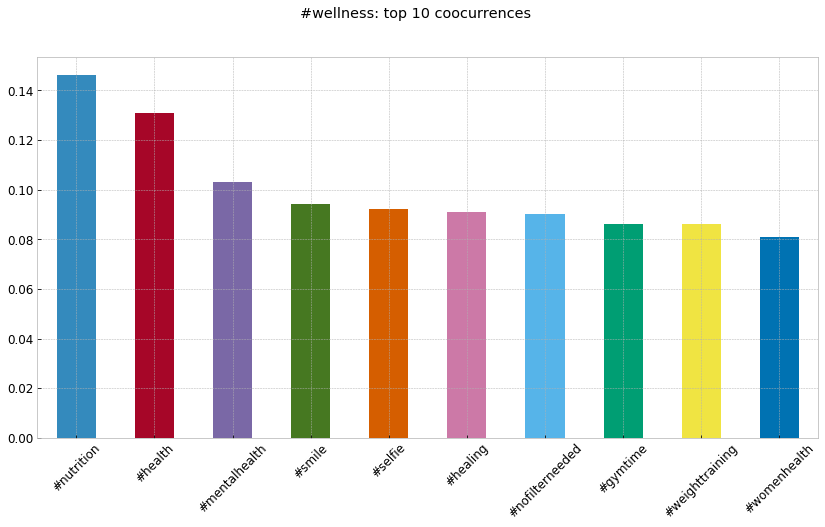

In [94]:
cooc = top_k_cooc(C,target_word,K, True)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
cooc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("{}: top {} coocurrences".format(target_word, K))

In [95]:
#get top words
top_words = list(cooc.keys())
print(top_words)
#get coocurrences between top words
TC = get_coos(C, top_words)
TC
# C.loc[cooc_words,cooc_words]

['#nutrition', '#health', '#mentalhealth', '#smile', '#selfie', '#healing', '#nofilterneeded', '#gymtime', '#weighttraining', '#womenhealth']


,#nutrition,#health,#mentalhealth,#smile,#selfie,#healing,#nofilterneeded,#gymtime,#weighttraining,#womenhealth
#nutrition,0,515,12,1,0,4,0,0,0,0
#health,515,0,81,879,876,16,875,875,431,331
#mentalhealth,12,81,0,2,0,30,0,0,0,0
#smile,1,879,2,0,1135,0,1127,875,430,0
#selfie,0,876,0,1135,0,0,226,875,430,0
#healing,4,16,30,0,0,0,0,0,0,0
#nofilterneeded,0,875,0,1127,226,0,0,874,429,0
#gymtime,0,875,0,875,875,0,874,0,430,0
#weighttraining,0,431,0,430,430,0,429,430,0,0
#womenhealth,0,331,0,0,0,0,0,0,0,0


In [113]:
nodes=[]
edges=[]

for i,w in enumerate(top_words):
    nodes.append({'label': w,
                   'x': random.randint(0,100),
                   'y': random.randint(0,100),
                   'id': top_words.index(w),
                   'size': TC[w].sum(),
                   'color': colours[i%10]})
# nodes
for i, (w1, w2) in enumerate(itertools.combinations(top_words,2)):
    c = TC[w1][w2]
    if c==0:continue
    edges.append({'source': top_words.index(w1),
                 'target': top_words.index(w2),
                 'id': i,
                 'size': c,
                 'color': '#ccc'})

g = { "nodes":nodes,
      "edges":edges}
g   

{'nodes': [{'label': '#nutrition',
   'x': 17,
   'y': 8,
   'id': 0,
   'size': 532,
   'color': '#348ABD'},
  {'label': '#health',
   'x': 24,
   'y': 48,
   'id': 1,
   'size': 4879,
   'color': '#A60628'},
  {'label': '#mentalhealth',
   'x': 22,
   'y': 44,
   'id': 2,
   'size': 125,
   'color': '#7A68A6'},
  {'label': '#smile',
   'x': 8,
   'y': 90,
   'id': 3,
   'size': 4449,
   'color': '#467821'},
  {'label': '#selfie',
   'x': 38,
   'y': 52,
   'id': 4,
   'size': 3542,
   'color': '#D55E00'},
  {'label': '#healing',
   'x': 14,
   'y': 37,
   'id': 5,
   'size': 50,
   'color': '#CC79A7'},
  {'label': '#nofilterneeded',
   'x': 20,
   'y': 63,
   'id': 6,
   'size': 3531,
   'color': '#56B4E9'},
  {'label': '#gymtime',
   'x': 0,
   'y': 85,
   'id': 7,
   'size': 3929,
   'color': '#009E73'},
  {'label': '#weighttraining',
   'x': 15,
   'y': 96,
   'id': 8,
   'size': 2150,
   'color': '#F0E442'},
  {'label': '#womenhealth',
   'x': 97,
   'y': 38,
   'id': 9,
   'size

In [106]:
top_words.index("#a")

ValueError: '#a' is not in list

In [131]:

ht = '''<style type="text/css">
body {
margin: 0;
}
#graph-container {
            top: 0;
            bottom: 0;
            left: 0;
            right: 0;
            position: relative;
            height:600px
    }
</style>
<body>
    <div id="graph-container"></div>
    <script> (function(a){"use strict";var b={},c=function(a){var d,e,f,g,h;c.classes.dispatcher.extend(this);var i=this,j=a||{};if("string"==typeof j||j instanceof HTMLElement?j={renderers:[j]}:"[object Array]"===Object.prototype.toString.call(j)&&(j={renderers:j}),g=j.renderers||j.renderer||j.container,j.renderers&&0!==j.renderers.length||("string"==typeof g||g instanceof HTMLElement||"object"==typeof g&&"container"in g)&&(j.renderers=[g]),j.id){if(b[j.id])throw'sigma: Instance "'+j.id+'" already exists.';Object.defineProperty(this,"id",{value:j.id})}else{for(h=0;b[h];)h++;Object.defineProperty(this,"id",{value:""+h})}for(b[this.id]=this,this.settings=new c.classes.configurable(c.settings,j.settings||{}),Object.defineProperty(this,"graph",{value:new c.classes.graph(this.settings),configurable:!0}),Object.defineProperty(this,"middlewares",{value:[],configurable:!0}),Object.defineProperty(this,"cameras",{value:{},configurable:!0}),Object.defineProperty(this,"renderers",{value:{},configurable:!0}),Object.defineProperty(this,"renderersPerCamera",{value:{},configurable:!0}),Object.defineProperty(this,"cameraFrames",{value:{},configurable:!0}),Object.defineProperty(this,"camera",{get:function(){return this.cameras[0]}}),Object.defineProperty(this,"events",{value:["click","rightClick","clickStage","doubleClickStage","rightClickStage","clickNode","clickNodes","doubleClickNode","doubleClickNodes","rightClickNode","rightClickNodes","overNode","overNodes","outNode","outNodes","downNode","downNodes","upNode","upNodes"],configurable:!0}),this._handler=function(a){var b,c={};for(b in a.data)c[b]=a.data[b];c.renderer=a.target,this.dispatchEvent(a.type,c)}.bind(this),f=j.renderers||[],d=0,e=f.length;d<e;d++)this.addRenderer(f[d]);for(f=j.middlewares||[],d=0,e=f.length;d<e;d++)this.middlewares.push("string"==typeof f[d]?c.middlewares[f[d]]:f[d]);"object"==typeof j.graph&&j.graph&&(this.graph.read(j.graph),this.refresh()),window.addEventListener("resize",function(){i.settings&&i.refresh()})};if(c.prototype.addCamera=function(b){var d,e=this;if(!arguments.length){for(b=0;this.cameras[""+b];)b++;b=""+b}if(this.cameras[b])throw'sigma.addCamera: The camera "'+b+'" already exists.';return d=new c.classes.camera(b,this.graph,this.settings),this.cameras[b]=d,d.quadtree=new c.classes.quad,c.classes.edgequad!==a&&(d.edgequadtree=new c.classes.edgequad),d.bind("coordinatesUpdated",function(a){e.renderCamera(d,d.isAnimated)}),this.renderersPerCamera[b]=[],d},c.prototype.killCamera=function(a){if(!(a="string"==typeof a?this.cameras[a]:a))throw"sigma.killCamera: The camera is undefined.";var b,c,d=this.renderersPerCamera[a.id];for(c=d.length,b=c-1;b>=0;b--)this.killRenderer(d[b]);return delete this.renderersPerCamera[a.id],delete this.cameraFrames[a.id],delete this.cameras[a.id],a.kill&&a.kill(),this},c.prototype.addRenderer=function(a){var b,d,e,f,g=a||{};if("string"==typeof g?g={container:document.getElementById(g)}:g instanceof HTMLElement&&(g={container:g}),"string"==typeof g.container&&(g.container=document.getElementById(g.container)),"id"in g)b=g.id;else{for(b=0;this.renderers[""+b];)b++;b=""+b}if(this.renderers[b])throw'sigma.addRenderer: The renderer "'+b+'" already exists.';if(d="function"==typeof g.type?g.type:c.renderers[g.type],d=d||c.renderers.def,e="camera"in g?g.camera instanceof c.classes.camera?g.camera:this.cameras[g.camera]||this.addCamera(g.camera):this.addCamera(),this.cameras[e.id]!==e)throw"sigma.addRenderer: The camera is not properly referenced.";return f=new d(this.graph,e,this.settings,g),this.renderers[b]=f,Object.defineProperty(f,"id",{value:b}),f.bind&&f.bind(["click","rightClick","clickStage","doubleClickStage","rightClickStage","clickNode","clickNodes","clickEdge","clickEdges","doubleClickNode","doubleClickNodes","doubleClickEdge","doubleClickEdges","rightClickNode","rightClickNodes","rightClickEdge","rightClickEdges","overNode","overNodes","overEdge","overEdges","outNode","outNodes","outEdge","outEdges","downNode","downNodes","downEdge","downEdges","upNode","upNodes","upEdge","upEdges"],this._handler),this.renderersPerCamera[e.id].push(f),f},c.prototype.killRenderer=function(a){if(!(a="string"==typeof a?this.renderers[a]:a))throw"sigma.killRenderer: The renderer is undefined.";var b=this.renderersPerCamera[a.camera.id],c=b.indexOf(a);return c>=0&&b.splice(c,1),a.kill&&a.kill(),delete this.renderers[a.id],this},c.prototype.refresh=function(b){var d,e,f,g,h,i,j=0;for(b=b||{},g=this.middlewares||[],d=0,e=g.length;d<e;d++)g[d].call(this,0===d?"":"tmp"+j+":",d===e-1?"ready:":"tmp"+ ++j+":");for(f in this.cameras)h=this.cameras[f],h.settings("autoRescale")&&this.renderersPerCamera[h.id]&&this.renderersPerCamera[h.id].length?c.middlewares.rescale.call(this,g.length?"ready:":"",h.readPrefix,{width:this.renderersPerCamera[h.id][0].width,height:this.renderersPerCamera[h.id][0].height}):c.middlewares.copy.call(this,g.length?"ready:":"",h.readPrefix),b.skipIndexation||(i=c.utils.getBoundaries(this.graph,h.readPrefix),h.quadtree.index(this.graph.nodes(),{prefix:h.readPrefix,bounds:{x:i.minX,y:i.minY,width:i.maxX-i.minX,height:i.maxY-i.minY}}),h.edgequadtree!==a&&h.settings("drawEdges")&&h.settings("enableEdgeHovering")&&h.edgequadtree.index(this.graph,{prefix:h.readPrefix,bounds:{x:i.minX,y:i.minY,width:i.maxX-i.minX,height:i.maxY-i.minY}}));for(g=Object.keys(this.renderers),d=0,e=g.length;d<e;d++)if(this.renderers[g[d]].process)if(this.settings("skipErrors"))try{this.renderers[g[d]].process()}catch(a){console.log('Warning: The renderer "'+g[d]+'" crashed on ".process()"')}else this.renderers[g[d]].process();return this.render(),this},c.prototype.render=function(){var a,b,c;for(c=Object.keys(this.renderers),a=0,b=c.length;a<b;a++)if(this.settings("skipErrors"))try{this.renderers[c[a]].render()}catch(b){this.settings("verbose")&&console.log('Warning: The renderer "'+c[a]+'" crashed on ".render()"')}else this.renderers[c[a]].render();return this},c.prototype.renderCamera=function(a,b){var c,d,e,f=this;if(b)for(e=this.renderersPerCamera[a.id],c=0,d=e.length;c<d;c++)if(this.settings("skipErrors"))try{e[c].render()}catch(a){this.settings("verbose")&&console.log('Warning: The renderer "'+e[c].id+'" crashed on ".render()"')}else e[c].render();else if(!this.cameraFrames[a.id]){for(e=this.renderersPerCamera[a.id],c=0,d=e.length;c<d;c++)if(this.settings("skipErrors"))try{e[c].render()}catch(a){this.settings("verbose")&&console.log('Warning: The renderer "'+e[c].id+'" crashed on ".render()"')}else e[c].render();this.cameraFrames[a.id]=requestAnimationFrame(function(){delete f.cameraFrames[a.id]})}return this},c.prototype.kill=function(){var a;this.dispatchEvent("kill"),this.graph.kill(),delete this.middlewares;for(a in this.renderers)this.killRenderer(this.renderers[a]);for(a in this.cameras)this.killCamera(this.cameras[a]);delete this.renderers,delete this.cameras;for(a in this)this.hasOwnProperty(a)&&delete this[a];delete b[this.id]},c.instances=function(a){return arguments.length?b[a]:c.utils.extend({},b)},c.version="1.2.1",void 0!==this.sigma)throw"An object called sigma is already in the global scope.";this.sigma=c}).call(this),function(a){"use strict";function b(a,c){var d,e,f,g;if(arguments.length)if(1===arguments.length&&Object(arguments[0])===arguments[0])for(a in arguments[0])b(a,arguments[0][a]);else if(arguments.length>1)for(g=Array.isArray(a)?a:a.split(/ /),d=0,e=g.length;d!==e;d+=1)f=g[d],C[f]||(C[f]=[]),C[f].push({handler:c})}function c(a,b){var c,d,e,f,g,h,i=Array.isArray(a)?a:a.split(/ /);if(arguments.length)if(b)for(c=0,d=i.length;c!==d;c+=1){if(h=i[c],C[h]){for(g=[],e=0,f=C[h].length;e!==f;e+=1)C[h][e].handler!==b&&g.push(C[h][e]);C[h]=g}C[h]&&0===C[h].length&&delete C[h]}else for(c=0,d=i.length;c!==d;c+=1)delete C[i[c]];else C=Object.create(null)}function d(a,b){var c,d,e,f,g,h,i=Array.isArray(a)?a:a.split(/ /);for(b=void 0===b?{}:b,c=0,e=i.length;c!==e;c+=1)if(h=i[c],C[h])for(g={type:h,data:b||{}},d=0,f=C[h].length;d!==f;d+=1)try{C[h][d].handler(g)}catch(a){}}function e(){var a,b,c,d,e=!1,f=s(),g=x.shift();if(c=g.job(),f=s()-f,g.done++,g.time+=f,g.currentTime+=f,g.weightTime=g.currentTime/(g.weight||1),g.averageTime=g.time/g.done,!(d=g.count?g.count<=g.done:!c)){for(a=0,b=x.length;a<b;a++)if(x[a].weightTime>g.weightTime){x.splice(a,0,g),e=!0;break}e||x.push(g)}return d?g:null}function f(a){var b=x.length;w[a.id]=a,a.status="running",b&&(a.weightTime=x[b-1].weightTime,a.currentTime=a.weightTime*(a.weight||1)),a.startTime=s(),d("jobStarted",q(a)),x.push(a)}function g(){var a,b,c;for(a in v)b=v[a],b.after?y[a]=b:f(b),delete v[a];for(u=!!x.length;x.length&&s()-t<B.frameDuration;)if(c=e()){i(c.id);for(a in y)y[a].after===c.id&&(f(y[a]),delete y[a])}u?(t=s(),d("enterFrame"),setTimeout(g,0)):d("stop")}function h(a,b){var c,e,f;if(Array.isArray(a)){for(A=!0,c=0,e=a.length;c<e;c++)h(a[c].id,p(a[c],b));A=!1,u||(t=s(),d("start"),g())}else if("object"==typeof a)if("string"==typeof a.id)h(a.id,a);else{A=!0;for(c in a)"function"==typeof a[c]?h(c,p({job:a[c]},b)):h(c,p(a[c],b));A=!1,u||(t=s(),d("start"),g())}else{if("string"!=typeof a)throw new Error("[conrad.addJob] Wrong arguments.");if(k(a))throw new Error('[conrad.addJob] Job with id "'+a+'" already exists.');if("function"==typeof b)f={id:a,done:0,time:0,status:"waiting",currentTime:0,averageTime:0,weightTime:0,job:b};else{if("object"!=typeof b)throw new Error("[conrad.addJob] Wrong arguments.");f=p({id:a,done:0,time:0,status:"waiting",currentTime:0,averageTime:0,weightTime:0},b)}v[a]=f,d("jobAdded",q(f)),u||A||(t=s(),d("start"),g())}return this}function i(a){var b,c,e,f,g=!1;if(Array.isArray(a))for(b=0,c=a.length;b<c;b++)i(a[b]);else{if("string"!=typeof a)throw new Error("[conrad.killJob] Wrong arguments.");for(e=[w,y,v],b=0,c=e.length;b<c;b++)a in e[b]&&(f=e[b][a],B.history&&(f.status="done",z.push(f)),d("jobEnded",q(f)),delete e[b][a],"function"==typeof f.end&&f.end(),g=!0);for(e=x,b=0,c=e.length;b<c;b++)if(e[b].id===a){e.splice(b,1);break}if(!g)throw new Error('[conrad.killJob] Job "'+a+'" not found.')}return this}function j(){var a,b=p(v,w,y);if(B.history)for(a in b)b[a].status="done",z.push(b[a]),"function"==typeof b[a].end&&b[a].end();return v={},y={},w={},x=[],u=!1,this}function k(a){var b=v[a]||w[a]||y[a];return b?p(b):null}function l(a,b){var c;if("string"==typeof a1&&1===arguments.length)return B[a1];c="object"==typeof a1&&1===arguments.length?a1||{}:{},"string"==typeof a1&&(c[a1]=a2);for(var d in c)void 0!==c[d]?B[d]=c[d]:delete B[d];return this}function m(){return u}function n(){return z=[],this}function o(a,b){var c,d,e,f,g,h,i;if(!arguments.length){g=[];for(d in v)g.push(v[d]);for(d in y)g.push(y[d]);for(d in w)g.push(w[d]);g=g.concat(z)}if("string"==typeof a)switch(a){case"waiting":g=r(y);break;case"running":g=r(w);break;case"done":g=z;break;default:h=a}if(a instanceof RegExp&&(h=a),!h&&("string"==typeof b||b instanceof RegExp)&&(h=b),h){if(i="string"==typeof h,g instanceof Array)c=g;else if("object"==typeof g){c=[];for(d in g)c=c.concat(g[d])}else{c=[];for(d in v)c.push(v[d]);for(d in y)c.push(y[d]);for(d in w)c.push(w[d]);c=c.concat(z)}for(g=[],e=0,f=c.length;e<f;e++)(i?c[e].id===h:c[e].id.match(h))&&g.push(c[e])}return q(g)}function p(){var a,b,c={},d=arguments.length;for(a=d-1;a>=0;a--)for(b in arguments[a])c[b]=arguments[a][b];return c}function q(a){var b,c,d;if(!a)return a;if(Array.isArray(a))for(b=[],c=0,d=a.length;c<d;c++)b.push(q(a[c]));else if("object"==typeof a){b={};for(c in a)b[c]=q(a[c])}else b=a;return b}function r(a){var b,c=[];for(b in a)c.push(a[b]);return c}function s(){return Date.now?Date.now():(new Date).getTime()}if(a.conrad)throw new Error("conrad already exists");var t,u=!1,v={},w={},x=[],y={},z=[],A=!1,B={frameDuration:20,history:!0},C=Object.create(null);Array.isArray||(Array.isArray=function(a){return"[object Array]"===Object.prototype.toString.call(a)});var D={hasJob:k,addJob:h,killJob:i,killAll:j,settings:l,getStats:o,isRunning:m,clearHistory:n,bind:b,unbind:c,version:"0.1.0"};"undefined"!=typeof exports&&("undefined"!=typeof module&&module.exports&&(exports=module.exports=D),exports.conrad=D),a.conrad=D}(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";var b=this;sigma.utils=sigma.utils||{},sigma.utils.extend=function(){var a,b,c={},d=arguments.length;for(a=d-1;a>=0;a--)for(b in arguments[a])c[b]=arguments[a][b];return c},sigma.utils.dateNow=function(){return Date.now?Date.now():(new Date).getTime()},sigma.utils.pkg=function(a){return(a||"").split(".").reduce(function(a,b){return b in a?a[b]:a[b]={}},b)},sigma.utils.id=function(){var a=0;return function(){return++a}}();var c={};sigma.utils.floatColor=function(a){if(c[a])return c[a];var b=a,d=0,e=0,f=0;"#"===a[0]?(a=a.slice(1),3===a.length?(d=parseInt(a.charAt(0)+a.charAt(0),16),e=parseInt(a.charAt(1)+a.charAt(1),16),f=parseInt(a.charAt(2)+a.charAt(2),16)):(d=parseInt(a.charAt(0)+a.charAt(1),16),e=parseInt(a.charAt(2)+a.charAt(3),16),f=parseInt(a.charAt(4)+a.charAt(5),16))):a.match(/^ *rgba? *\(/)&&(a=a.match(/^ *rgba? *\( *([0-9]*) *, *([0-9]*) *, *([0-9]*) *(,.*)?\) *$/),d=+a[1],e=+a[2],f=+a[3]);var g=256*d*256+256*e+f;return c[b]=g,g},sigma.utils.zoomTo=function(a,b,c,d,e){var f,g,h,i=a.settings;(g=Math.max(i("zoomMin"),Math.min(i("zoomMax"),a.ratio*d)))!==a.ratio&&(d=g/a.ratio,h={x:b*(1-d)+a.x,y:c*(1-d)+a.y,ratio:g},e&&e.duration?(f=sigma.misc.animation.killAll(a),e=sigma.utils.extend(e,{easing:f?"quadraticOut":"quadraticInOut"}),sigma.misc.animation.camera(a,h,e)):(a.goTo(h),e&&e.onComplete&&e.onComplete()))},sigma.utils.getQuadraticControlPoint=function(a,b,c,d){return{x:(a+c)/2+(d-b)/4,y:(b+d)/2+(a-c)/4}},sigma.utils.getPointOnQuadraticCurve=function(a,b,c,d,e,f,g){return{x:Math.pow(1-a,2)*b+2*(1-a)*a*f+Math.pow(a,2)*d,y:Math.pow(1-a,2)*c+2*(1-a)*a*g+Math.pow(a,2)*e}},sigma.utils.getPointOnBezierCurve=function(a,b,c,d,e,f,g,h,i){var j=Math.pow(1-a,3),k=3*a*Math.pow(1-a,2),l=3*Math.pow(a,2)*(1-a),m=Math.pow(a,3);return{x:j*b+k*f+l*h+m*d,y:j*c+k*g+l*i+m*e}},sigma.utils.getSelfLoopControlPoints=function(a,b,c){return{x1:a-7*c,y1:b,x2:a,y2:b+7*c}},sigma.utils.getDistance=function(a,b,c,d){return Math.sqrt(Math.pow(c-a,2)+Math.pow(d-b,2))},sigma.utils.getCircleIntersection=function(a,b,c,d,e,f){var g,h,i,j,k,l,m,n,o;return h=d-a,i=e-b,!((j=Math.sqrt(i*i+h*h))>c+f)&&(!(j<Math.abs(c-f))&&(g=(c*c-f*f+j*j)/(2*j),n=a+h*g/j,o=b+i*g/j,k=Math.sqrt(c*c-g*g),l=k/j*-i,m=h*(k/j),{xi:n+l,xi_prime:n-l,yi:o+m,yi_prime:o-m}))},sigma.utils.isPointOnSegment=function(a,b,c,d,e,f,g){return Math.abs((b-d)*(e-c)-(a-c)*(f-d))/sigma.utils.getDistance(c,d,e,f)<g&&Math.min(c,e)<=a&&a<=Math.max(c,e)&&Math.min(d,f)<=b&&b<=Math.max(d,f)},sigma.utils.isPointOnQuadraticCurve=function(a,b,c,d,e,f,g,h,i){var j=sigma.utils.getDistance(c,d,e,f);if(Math.abs(a-c)>j||Math.abs(b-d)>j)return!1;for(var k,l=sigma.utils.getDistance(a,b,c,d),m=sigma.utils.getDistance(a,b,e,f),n=.5,o=l<m?-.01:.01,p=.001,q=100,r=sigma.utils.getPointOnQuadraticCurve(n,c,d,e,f,g,h),s=sigma.utils.getDistance(a,b,r.x,r.y);q-- >0&&n>=0&&n<=1&&s>i&&(o>p||o<-p);)k=s,r=sigma.utils.getPointOnQuadraticCurve(n,c,d,e,f,g,h),s=sigma.utils.getDistance(a,b,r.x,r.y),s>k?(o=-o/2,n+=o):n+o<0||n+o>1?(o/=2,s=k):n+=o;return s<i},sigma.utils.isPointOnBezierCurve=function(a,b,c,d,e,f,g,h,i,j,k){var l=sigma.utils.getDistance(c,d,g,h);if(Math.abs(a-c)>l||Math.abs(b-d)>l)return!1;for(var m,n=sigma.utils.getDistance(a,b,c,d),o=sigma.utils.getDistance(a,b,e,f),p=.5,q=n<o?-.01:.01,r=.001,s=100,t=sigma.utils.getPointOnBezierCurve(p,c,d,e,f,g,h,i,j),u=sigma.utils.getDistance(a,b,t.x,t.y);s-- >0&&p>=0&&p<=1&&u>k&&(q>r||q<-r);)m=u,t=sigma.utils.getPointOnBezierCurve(p,c,d,e,f,g,h,i,j),u=sigma.utils.getDistance(a,b,t.x,t.y),u>m?(q=-q/2,p+=q):p+q<0||p+q>1?(q/=2,u=m):p+=q;return u<k},sigma.utils.getX=function(b){return b.offsetX!==a&&b.offsetX||b.layerX!==a&&b.layerX||b.clientX!==a&&b.clientX},sigma.utils.getY=function(b){return b.offsetY!==a&&b.offsetY||b.layerY!==a&&b.layerY||b.clientY!==a&&b.clientY},sigma.utils.getPixelRatio=function(){var b=1;return window.screen.deviceXDPI!==a&&window.screen.logicalXDPI!==a&&window.screen.deviceXDPI>window.screen.logicalXDPI?b=window.screen.systemXDPI/window.screen.logicalXDPI:window.devicePixelRatio!==a&&(b=window.devicePixelRatio),b},sigma.utils.getWidth=function(b){var c=b.target.ownerSVGElement?b.target.ownerSVGElement.width:b.target.width;return"number"==typeof c&&c||c!==a&&c.baseVal!==a&&c.baseVal.value},sigma.utils.getCenter=function(a){var b=-1!==a.target.namespaceURI.indexOf("svg")?1:sigma.utils.getPixelRatio();return{x:sigma.utils.getWidth(a)/(2*b),y:sigma.utils.getHeight(a)/(2*b)}},sigma.utils.mouseCoords=function(a,b,c){return b=b||sigma.utils.getX(a),c=c||sigma.utils.getY(a),{x:b-sigma.utils.getCenter(a).x,y:c-sigma.utils.getCenter(a).y,clientX:a.clientX,clientY:a.clientY,ctrlKey:a.ctrlKey,metaKey:a.metaKey,altKey:a.altKey,shiftKey:a.shiftKey}},sigma.utils.getHeight=function(b){var c=b.target.ownerSVGElement?b.target.ownerSVGElement.height:b.target.height;return"number"==typeof c&&c||c!==a&&c.baseVal!==a&&c.baseVal.value},sigma.utils.getDelta=function(b){return b.wheelDelta!==a&&b.wheelDelta||b.detail!==a&&-b.detail},sigma.utils.getOffset=function(a){for(var b=0,c=0;a;)c+=parseInt(a.offsetTop),b+=parseInt(a.offsetLeft),a=a.offsetParent;return{top:c,left:b}},sigma.utils.doubleClick=function(a,b,c){var d,e=0;a._doubleClickHandler=a._doubleClickHandler||{},a._doubleClickHandler[b]=a._doubleClickHandler[b]||[],d=a._doubleClickHandler[b],d.push(function(a){if(2===++e)return e=0,c(a);1===e&&setTimeout(function(){e=0},sigma.settings.doubleClickTimeout)}),a.addEventListener(b,d[d.length-1],!1)},sigma.utils.unbindDoubleClick=function(a,b){for(var c,d=(a._doubleClickHandler||{})[b]||[];c=d.pop();)a.removeEventListener(b,c);delete(a._doubleClickHandler||{})[b]},sigma.utils.easings=sigma.utils.easings||{},sigma.utils.easings.linearNone=function(a){return a},sigma.utils.easings.quadraticIn=function(a){return a*a},sigma.utils.easings.quadraticOut=function(a){return a*(2-a)},sigma.utils.easings.quadraticInOut=function(a){return(a*=2)<1?.5*a*a:-.5*(--a*(a-2)-1)},sigma.utils.easings.cubicIn=function(a){return a*a*a},sigma.utils.easings.cubicOut=function(a){return--a*a*a+1},sigma.utils.easings.cubicInOut=function(a){return(a*=2)<1?.5*a*a*a:.5*((a-=2)*a*a+2)},sigma.utils.loadShader=function(a,b,c,d){var e,f=a.createShader(c);return a.shaderSource(f,b),a.compileShader(f),e=a.getShaderParameter(f,a.COMPILE_STATUS),e?f:(d&&d('Error compiling shader "'+f+'":'+a.getShaderInfoLog(f)),a.deleteShader(f),null)},sigma.utils.loadProgram=function(a,b,c,d,e){var f,g,h=a.createProgram();for(f=0;f<b.length;++f)a.attachShader(h,b[f]);if(c)for(f=0;f<c.length;++f)a.bindAttribLocation(h,locations?locations[f]:f,opt_attribs[f]);return a.linkProgram(h),g=a.getProgramParameter(h,a.LINK_STATUS),g?h:(e&&e("Error in program linking: "+a.getProgramInfoLog(h)),a.deleteProgram(h),null)},sigma.utils.pkg("sigma.utils.matrices"),sigma.utils.matrices.translation=function(a,b){return[1,0,0,0,1,0,a,b,1]},sigma.utils.matrices.rotation=function(a,b){var c=Math.cos(a),d=Math.sin(a);return b?[c,-d,d,c]:[c,-d,0,d,c,0,0,0,1]},sigma.utils.matrices.scale=function(a,b){return b?[a,0,0,a]:[a,0,0,0,a,0,0,0,1]},sigma.utils.matrices.multiply=function(a,b,c){var d=c?2:3,e=a[0*d+0],f=a[0*d+1],g=a[0*d+2],h=a[1*d+0],i=a[1*d+1],j=a[1*d+2],k=a[2*d+0],l=a[2*d+1],m=a[2*d+2],n=b[0*d+0],o=b[0*d+1],p=b[0*d+2],q=b[1*d+0],r=b[1*d+1],s=b[1*d+2],t=b[2*d+0],u=b[2*d+1],v=b[2*d+2];return c?[e*n+f*q,e*o+f*r,h*n+i*q,h*o+i*r]:[e*n+f*q+g*t,e*o+f*r+g*u,e*p+f*s+g*v,h*n+i*q+j*t,h*o+i*r+j*u,h*p+i*s+j*v,k*n+l*q+m*t,k*o+l*r+m*u,k*p+l*s+m*v]}}.call(this),function(a){"use strict";var b,c=0,d=["ms","moz","webkit","o"];for(b=0;b<d.length&&!a.requestAnimationFrame;b++)a.requestAnimationFrame=a[d[b]+"RequestAnimationFrame"],a.cancelAnimationFrame=a[d[b]+"CancelAnimationFrame"]||a[d[b]+"CancelRequestAnimationFrame"];a.requestAnimationFrame||(a.requestAnimationFrame=function(b,d){var e=(new Date).getTime(),f=Math.max(0,16-(e-c)),g=a.setTimeout(function(){b(e+f)},f);return c=e+f,g}),a.cancelAnimationFrame||(a.cancelAnimationFrame=function(a){clearTimeout(a)}),Function.prototype.bind||(Function.prototype.bind=function(a){if("function"!=typeof this)throw new TypeError("Function.prototype.bind - what is trying to be bound is not callable");var b,c,d=Array.prototype.slice.call(arguments,1),e=this;return b=function(){},c=function(){return e.apply(this instanceof b&&a?this:a,d.concat(Array.prototype.slice.call(arguments)))},b.prototype=this.prototype,c.prototype=new b,c})}(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.settings");var b={clone:!0,immutable:!0,verbose:!1,classPrefix:"sigma",defaultNodeType:"def",defaultEdgeType:"def",defaultLabelColor:"#000",defaultEdgeColor:"#000",defaultNodeColor:"#000",defaultLabelSize:14,edgeColor:"source",minArrowSize:0,font:"arial",fontStyle:"",labelColor:"default",labelSize:"fixed",labelSizeRatio:1,labelThreshold:8,webglOversamplingRatio:2,borderSize:0,defaultNodeBorderColor:"#000",hoverFont:"",singleHover:!0,hoverFontStyle:"",labelHoverShadow:"default",labelHoverShadowColor:"#000",nodeHoverColor:"node",defaultNodeHoverColor:"#000",labelHoverBGColor:"default",defaultHoverLabelBGColor:"#fff",labelHoverColor:"default",defaultLabelHoverColor:"#000",edgeHoverColor:"edge",edgeHoverSizeRatio:1,defaultEdgeHoverColor:"#000",edgeHoverExtremities:!1,drawEdges:!0,drawNodes:!0,drawLabels:!0,drawEdgeLabels:!1,batchEdgesDrawing:!1,hideEdgesOnMove:!1,canvasEdgesBatchSize:500,webglEdgesBatchSize:1e3,scalingMode:"inside",sideMargin:0,minEdgeSize:.5,maxEdgeSize:1,minNodeSize:1,maxNodeSize:8,touchEnabled:!0,mouseEnabled:!0,mouseWheelEnabled:!0,doubleClickEnabled:!0,eventsEnabled:!0,zoomingRatio:1.7,doubleClickZoomingRatio:2.2,zoomMin:.0625,zoomMax:2,mouseZoomDuration:200,doubleClickZoomDuration:200,mouseInertiaDuration:200,mouseInertiaRatio:3,touchInertiaDuration:200,touchInertiaRatio:3,doubleClickTimeout:300,doubleTapTimeout:300,dragTimeout:200,autoResize:!0,autoRescale:!0,enableCamera:!0,enableHovering:!0,enableEdgeHovering:!1,edgeHoverPrecision:5,rescaleIgnoreSize:!1,skipErrors:!1,nodesPowRatio:.5,edgesPowRatio:.5,animationsTime:200};sigma.settings=sigma.utils.extend(sigma.settings||{},b)}.call(this),function(){"use strict";var a=function(){Object.defineProperty(this,"_handlers",{value:{}})};a.prototype.bind=function(a,b){var c,d,e,f;if(1===arguments.length&&"object"==typeof arguments[0])for(a in arguments[0])this.bind(a,arguments[0][a]);else{if(2!==arguments.length||"function"!=typeof arguments[1])throw"bind: Wrong arguments.";for(f="string"==typeof a?a.split(" "):a,c=0,d=f.length;c!==d;c+=1)(e=f[c])&&(this._handlers[e]||(this._handlers[e]=[]),this._handlers[e].push({handler:b}))}return this},a.prototype.unbind=function(a,b){var c,d,e,f,g,h,i,j="string"==typeof a?a.split(" "):a;if(!arguments.length){for(g in this._handlers)delete this._handlers[g];return this}if(b)for(c=0,d=j.length;c!==d;c+=1){if(i=j[c],this._handlers[i]){for(h=[],e=0,f=this._handlers[i].length;e!==f;e+=1)this._handlers[i][e].handler!==b&&h.push(this._handlers[i][e]);this._handlers[i]=h}this._handlers[i]&&0===this._handlers[i].length&&delete this._handlers[i]}else for(c=0,d=j.length;c!==d;c+=1)delete this._handlers[j[c]];return this},a.prototype.dispatchEvent=function(a,b){var c,d,e,f,g,h,i,j=this,k="string"==typeof a?a.split(" "):a;for(b=void 0===b?{}:b,c=0,d=k.length;c!==d;c+=1)if(i=k[c],this._handlers[i]){for(h=j.getEvent(i,b),g=[],e=0,f=this._handlers[i].length;e!==f;e+=1)this._handlers[i][e].handler(h),this._handlers[i][e].one||g.push(this._handlers[i][e]);this._handlers[i]=g}return this},a.prototype.getEvent=function(a,b){return{type:a,data:b||{},target:this}},a.extend=function(b,c){var d;for(d in a.prototype)a.prototype.hasOwnProperty(d)&&(b[d]=a.prototype[d]);a.apply(b,c)},void 0!==this.sigma?(this.sigma.classes=this.sigma.classes||{},this.sigma.classes.dispatcher=a):"undefined"!=typeof exports?("undefined"!=typeof module&&module.exports&&(exports=module.exports=a),exports.dispatcher=a):this.dispatcher=a}.call(this),function(){"use strict";var a=function(){var b,c,d={},e=Array.prototype.slice.call(arguments,0),f=function(a,b){var c,g,h,i;{if(1!==arguments.length||"string"!=typeof a){if("object"==typeof a&&"string"==typeof b)return void 0!==(a||{})[b]?a[b]:f(b);for(c="object"==typeof a&&void 0===b?a:{},"string"==typeof a&&(c[a]=b),g=0,i=Object.keys(c),h=i.length;g<h;g++)d[i[g]]=c[i[g]];return this}if(void 0!==d[a])return d[a];for(g=0,h=e.length;g<h;g++)if(void 0!==e[g][a])return e[g][a]}};for(f.embedObjects=function(){var b=e.concat(d).concat(Array.prototype.splice.call(arguments,0));return a.apply({},b)},b=0,c=arguments.length;b<c;b++)f(arguments[b]);return f};void 0!==this.sigma?(this.sigma.classes=this.sigma.classes||{},this.sigma.classes.configurable=a):"undefined"!=typeof exports?("undefined"!=typeof module&&module.exports&&(exports=module.exports=a),exports.configurable=a):this.configurable=a}.call(this),function(a){"use strict";function b(a,b,c){return function(){var d,e;for(d in h[a])h[a][d].apply(b,arguments);e=c.apply(b,arguments);for(d in g[a])g[a][d].apply(b,arguments);return e}}function c(a){var b;for(b in a)"hasOwnProperty"in a&&!a.hasOwnProperty(b)||delete a[b];return a}var d=Object.create(null),e=Object.create(null),f=Object.create(null),g=Object.create(null),h=Object.create(null),i={immutable:!0,clone:!0},j=function(a){return i[a]},k=function(a){var c,e,g;g={settings:a||j,nodesArray:[],edgesArray:[],nodesIndex:Object.create(null),edgesIndex:Object.create(null),inNeighborsIndex:Object.create(null),outNeighborsIndex:Object.create(null),allNeighborsIndex:Object.create(null),inNeighborsCount:Object.create(null),outNeighborsCount:Object.create(null),allNeighborsCount:Object.create(null)};for(c in f)f[c].call(g);for(c in d)e=b(c,g,d[c]),this[c]=e,g[c]=e};k.addMethod=function(a,b){if("string"!=typeof a||"function"!=typeof b||2!==arguments.length)throw"addMethod: Wrong arguments.";if(d[a]||k[a])throw'The method "'+a+'" already exists.';return d[a]=b,g[a]=Object.create(null),h[a]=Object.create(null),this},k.hasMethod=function(a){return!(!d[a]&&!k[a])},k.attach=function(a,b,c,d){if("string"!=typeof a||"string"!=typeof b||"function"!=typeof c||arguments.length<3||arguments.length>4)throw"attach: Wrong arguments.";var e;if("constructor"===a)e=f;else if(d){if(!h[a])throw'The method "'+a+'" does not exist.';e=h[a]}else{if(!g[a])throw'The method "'+a+'" does not exist.';e=g[a]}if(e[b])throw'A function "'+b+'" is already attached to the method "'+a+'".';return e[b]=c,this},k.attachBefore=function(a,b,c){return this.attach(a,b,c,!0)},k.addIndex=function(a,b){if("string"!=typeof a||Object(b)!==b||2!==arguments.length)throw"addIndex: Wrong arguments.";if(e[a])throw'The index "'+a+'" already exists.';var c;e[a]=b;for(c in b){if("function"!=typeof b[c])throw"The bindings must be functions.";k.attach(c,a,b[c])}return this},k.addMethod("addNode",function(a){if(Object(a)!==a||1!==arguments.length)throw"addNode: Wrong arguments.";if("string"!=typeof a.id&&"number"!=typeof a.id)throw"The node must have a string or number id.";if(this.nodesIndex[a.id])throw'The node "'+a.id+'" already exists.';var b,c=a.id,d=Object.create(null);if(this.settings("clone"))for(b in a)"id"!==b&&(d[b]=a[b]);else d=a;return this.settings("immutable")?Object.defineProperty(d,"id",{value:c,enumerable:!0}):d.id=c,this.inNeighborsIndex[c]=Object.create(null),this.outNeighborsIndex[c]=Object.create(null),this.allNeighborsIndex[c]=Object.create(null),this.inNeighborsCount[c]=0,this.outNeighborsCount[c]=0,this.allNeighborsCount[c]=0,this.nodesArray.push(d),this.nodesIndex[d.id]=d,this}),k.addMethod("addEdge",function(a){if(Object(a)!==a||1!==arguments.length)throw"addEdge: Wrong arguments.";if("string"!=typeof a.id&&"number"!=typeof a.id)throw"The edge must have a string or number id.";if("string"!=typeof a.source&&"number"!=typeof a.source||!this.nodesIndex[a.source])throw"The edge source must have an existing node id.";if("string"!=typeof a.target&&"number"!=typeof a.target||!this.nodesIndex[a.target])throw"The edge target must have an existing node id.";if(this.edgesIndex[a.id])throw'The edge "'+a.id+'" already exists.';var b,c=Object.create(null);if(this.settings("clone"))for(b in a)"id"!==b&&"source"!==b&&"target"!==b&&(c[b]=a[b]);else c=a;return this.settings("immutable")?(Object.defineProperty(c,"id",{value:a.id,enumerable:!0}),Object.defineProperty(c,"source",{value:a.source,enumerable:!0}),Object.defineProperty(c,"target",{value:a.target,enumerable:!0})):(c.id=a.id,c.source=a.source,c.target=a.target),this.edgesArray.push(c),this.edgesIndex[c.id]=c,this.inNeighborsIndex[c.target][c.source]||(this.inNeighborsIndex[c.target][c.source]=Object.create(null)),this.inNeighborsIndex[c.target][c.source][c.id]=c,this.outNeighborsIndex[c.source][c.target]||(this.outNeighborsIndex[c.source][c.target]=Object.create(null)),this.outNeighborsIndex[c.source][c.target][c.id]=c,this.allNeighborsIndex[c.source][c.target]||(this.allNeighborsIndex[c.source][c.target]=Object.create(null)),this.allNeighborsIndex[c.source][c.target][c.id]=c,c.target!==c.source&&(this.allNeighborsIndex[c.target][c.source]||(this.allNeighborsIndex[c.target][c.source]=Object.create(null)),this.allNeighborsIndex[c.target][c.source][c.id]=c),this.inNeighborsCount[c.target]++,this.outNeighborsCount[c.source]++,this.allNeighborsCount[c.target]++,this.allNeighborsCount[c.source]++,this}),k.addMethod("dropNode",function(a){if("string"!=typeof a&&"number"!=typeof a||1!==arguments.length)throw"dropNode: Wrong arguments.";if(!this.nodesIndex[a])throw'The node "'+a+'" does not exist.';var b,c,d;for(delete this.nodesIndex[a],b=0,d=this.nodesArray.length;b<d;b++)if(this.nodesArray[b].id===a){this.nodesArray.splice(b,1);break}for(b=this.edgesArray.length-1;b>=0;b--)this.edgesArray[b].source!==a&&this.edgesArray[b].target!==a||this.dropEdge(this.edgesArray[b].id);delete this.inNeighborsIndex[a],delete this.outNeighborsIndex[a],delete this.allNeighborsIndex[a],delete this.inNeighborsCount[a],delete this.outNeighborsCount[a],delete this.allNeighborsCount[a];for(c in this.nodesIndex)delete this.inNeighborsIndex[c][a],delete this.outNeighborsIndex[c][a],delete this.allNeighborsIndex[c][a];return this}),k.addMethod("dropEdge",function(a){if("string"!=typeof a&&"number"!=typeof a||1!==arguments.length)throw"dropEdge: Wrong arguments.";if(!this.edgesIndex[a])throw'The edge "'+a+'" does not exist.';var b,c,d;for(d=this.edgesIndex[a],delete this.edgesIndex[a],b=0,c=this.edgesArray.length;b<c;b++)if(this.edgesArray[b].id===a){this.edgesArray.splice(b,1);break}return delete this.inNeighborsIndex[d.target][d.source][d.id],Object.keys(this.inNeighborsIndex[d.target][d.source]).length||delete this.inNeighborsIndex[d.target][d.source],delete this.outNeighborsIndex[d.source][d.target][d.id],Object.keys(this.outNeighborsIndex[d.source][d.target]).length||delete this.outNeighborsIndex[d.source][d.target],delete this.allNeighborsIndex[d.source][d.target][d.id],Object.keys(this.allNeighborsIndex[d.source][d.target]).length||delete this.allNeighborsIndex[d.source][d.target],d.target!==d.source&&(delete this.allNeighborsIndex[d.target][d.source][d.id],Object.keys(this.allNeighborsIndex[d.target][d.source]).length||delete this.allNeighborsIndex[d.target][d.source]),this.inNeighborsCount[d.target]--,this.outNeighborsCount[d.source]--,this.allNeighborsCount[d.source]--,this.allNeighborsCount[d.target]--,this}),k.addMethod("kill",function(){this.nodesArray.length=0,this.edgesArray.length=0,delete this.nodesArray,delete this.edgesArray,delete this.nodesIndex,delete this.edgesIndex,delete this.inNeighborsIndex,delete this.outNeighborsIndex,delete this.allNeighborsIndex,delete this.inNeighborsCount,delete this.outNeighborsCount,delete this.allNeighborsCount}),k.addMethod("clear",function(){return this.nodesArray.length=0,this.edgesArray.length=0,c(this.nodesIndex),c(this.edgesIndex),c(this.nodesIndex),c(this.inNeighborsIndex),c(this.outNeighborsIndex),c(this.allNeighborsIndex),c(this.inNeighborsCount),c(this.outNeighborsCount),c(this.allNeighborsCount),this}),k.addMethod("read",function(a){var b,c,d;for(c=a.nodes||[],b=0,d=c.length;b<d;b++)this.addNode(c[b]);for(c=a.edges||[],b=0,d=c.length;b<d;b++)this.addEdge(c[b]);return this}),k.addMethod("nodes",function(a){if(!arguments.length)return this.nodesArray.slice(0);if(1===arguments.length&&("string"==typeof a||"number"==typeof a))return this.nodesIndex[a];if(1===arguments.length&&"[object Array]"===Object.prototype.toString.call(a)){var b,c,d=[];for(b=0,c=a.length;b<c;b++){if("string"!=typeof a[b]&&"number"!=typeof a[b])throw"nodes: Wrong arguments.";d.push(this.nodesIndex[a[b]])}return d}throw"nodes: Wrong arguments."}),k.addMethod("degree",function(a,b){if(b={in:this.inNeighborsCount,out:this.outNeighborsCount}[b||""]||this.allNeighborsCount,"string"==typeof a||"number"==typeof a)return b[a];if("[object Array]"===Object.prototype.toString.call(a)){var c,d,e=[];for(c=0,d=a.length;c<d;c++){if("string"!=typeof a[c]&&"number"!=typeof a[c])throw"degree: Wrong arguments.";e.push(b[a[c]])}return e}throw"degree: Wrong arguments."}),k.addMethod("edges",function(a){if(!arguments.length)return this.edgesArray.slice(0);if(1===arguments.length&&("string"==typeof a||"number"==typeof a))return this.edgesIndex[a];if(1===arguments.length&&"[object Array]"===Object.prototype.toString.call(a)){var b,c,d=[];for(b=0,c=a.length;b<c;b++){if("string"!=typeof a[b]&&"number"!=typeof a[b])throw"edges: Wrong arguments.";d.push(this.edgesIndex[a[b]])}return d}throw"edges: Wrong arguments."}),"undefined"!=typeof sigma?(sigma.classes=sigma.classes||Object.create(null),sigma.classes.graph=k):"undefined"!=typeof exports?("undefined"!=typeof module&&module.exports&&(exports=module.exports=k),exports.graph=k):this.graph=k}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.classes"),sigma.classes.camera=function(a,b,c,d){sigma.classes.dispatcher.extend(this),Object.defineProperty(this,"graph",{value:b}),Object.defineProperty(this,"id",{value:a}),Object.defineProperty(this,"readPrefix",{value:"read_cam"+a+":"}),Object.defineProperty(this,"prefix",{value:"cam"+a+":"}),this.x=0,this.y=0,this.ratio=1,this.angle=0,this.isAnimated=!1,this.settings="object"==typeof d&&d?c.embedObject(d):c},sigma.classes.camera.prototype.goTo=function(b){if(!this.settings("enableCamera"))return this;var c,d,e=b||{},f=["x","y","ratio","angle"];for(c=0,d=f.length;c<d;c++)if(e[f[c]]!==a){if("number"!=typeof e[f[c]]||isNaN(e[f[c]]))throw'Value for "'+f[c]+'" is not a number.';this[f[c]]=e[f[c]]}return this.dispatchEvent("coordinatesUpdated"),this},sigma.classes.camera.prototype.applyView=function(b,c,d){d=d||{},c=c!==a?c:this.prefix,b=b!==a?b:this.readPrefix;var e,f,g,h=d.nodes||this.graph.nodes(),i=d.edges||this.graph.edges(),j=Math.cos(this.angle)/this.ratio,k=Math.sin(this.angle)/this.ratio,l=Math.pow(this.ratio,this.settings("nodesPowRatio")),m=Math.pow(this.ratio,this.settings("edgesPowRatio")),n=(d.width||0)/2-this.x*j-this.y*k,o=(d.height||0)/2-this.y*j+this.x*k;for(e=0,f=h.length;e<f;e++)g=h[e],g[c+"x"]=(g[b+"x"]||0)*j+(g[b+"y"]||0)*k+n,g[c+"y"]=(g[b+"y"]||0)*j-(g[b+"x"]||0)*k+o,g[c+"size"]=(g[b+"size"]||0)/l;for(e=0,f=i.length;e<f;e++)i[e][c+"size"]=(i[e][b+"size"]||0)/m;return this},sigma.classes.camera.prototype.graphPosition=function(a,b,c){var d=0,e=0,f=Math.cos(this.angle),g=Math.sin(this.angle);return c||(d=-(this.x*f+this.y*g)/this.ratio,e=-(this.y*f-this.x*g)/this.ratio),{x:(a*f+b*g)/this.ratio+d,y:(b*f-a*g)/this.ratio+e}},sigma.classes.camera.prototype.cameraPosition=function(a,b,c){var d=0,e=0,f=Math.cos(this.angle),g=Math.sin(this.angle);return c||(d=-(this.x*f+this.y*g)/this.ratio,e=-(this.y*f-this.x*g)/this.ratio),{x:((a-d)*f-(b-e)*g)*this.ratio,y:((b-e)*f+(a-d)*g)*this.ratio}},sigma.classes.camera.prototype.getMatrix=function(){var a=sigma.utils.matrices.scale(1/this.ratio),b=sigma.utils.matrices.rotation(this.angle),c=sigma.utils.matrices.translation(-this.x,-this.y);return sigma.utils.matrices.multiply(c,sigma.utils.matrices.multiply(b,a))},sigma.classes.camera.prototype.getRectangle=function(a,b){var c=this.cameraPosition(a,0,!0),d=this.cameraPosition(0,b,!0),e=this.cameraPosition(a/2,b/2,!0),f=this.cameraPosition(a/4,0,!0).x,g=this.cameraPosition(0,b/4,!0).y;return{x1:this.x-e.x-f,y1:this.y-e.y-g,x2:this.x-e.x+f+c.x,y2:this.y-e.y-g+c.y,height:Math.sqrt(Math.pow(d.x,2)+Math.pow(d.y+2*g,2))}}}.call(this),function(a){"use strict";function b(a,b){var c=b.x+b.width/2,d=b.y+b.height/2,e=a.y<d,f=a.x<c;return e?f?0:1:f?2:3}function c(a,b){for(var c=[],d=0;d<4;d++)a.x2>=b[d][0].x&&a.x1<=b[d][1].x&&a.y1+a.height>=b[d][0].y&&a.y1<=b[d][2].y&&c.push(d);return c}function d(a,b){for(var c=[],d=0;d<4;d++)j.collision(a,b[d])&&c.push(d);return c}function e(a,b){var c,d,e=b.level+1,f=Math.round(b.bounds.width/2),g=Math.round(b.bounds.height/2),h=Math.round(b.bounds.x),j=Math.round(b.bounds.y);switch(a){case 0:c=h,d=j;break;case 1:c=h+f,d=j;break;case 2:c=h,d=j+g;break;case 3:c=h+f,d=j+g}return i({x:c,y:d,width:f,height:g},e,b.maxElements,b.maxLevel)}function f(b,d,g){if(g.level<g.maxLevel)for(var h=c(d,g.corners),i=0,j=h.length;i<j;i++)g.nodes[h[i]]===a&&(g.nodes[h[i]]=e(h[i],g)),f(b,d,g.nodes[h[i]]);else g.elements.push(b)}function g(c,d){if(d.level<d.maxLevel){var e=b(c,d.bounds);return d.nodes[e]!==a?g(c,d.nodes[e]):[]}return d.elements}function h(b,c,d,e){if(e=e||{},c.level<c.maxLevel)for(var f=d(b,c.corners),g=0,i=f.length;g<i;g++)c.nodes[f[g]]!==a&&h(b,c.nodes[f[g]],d,e);else for(var j=0,k=c.elements.length;j<k;j++)e[c.elements[j].id]===a&&(e[c.elements[j].id]=c.elements[j]);return e}function i(a,b,c,d){return{level:b||0,bounds:a,corners:j.splitSquare(a),maxElements:c||20,maxLevel:d||4,elements:[],nodes:[]}}var j={pointToSquare:function(a){return{x1:a.x-a.size,y1:a.y-a.size,x2:a.x+a.size,y2:a.y-a.size,height:2*a.size}},isAxisAligned:function(a){return a.x1===a.x2||a.y1===a.y2},axisAlignedTopPoints:function(a){return a.y1===a.y2&&a.x1<a.x2?a:a.x1===a.x2&&a.y2>a.y1?{x1:a.x1-a.height,y1:a.y1,x2:a.x1,y2:a.y1,height:a.height}:a.x1===a.x2&&a.y2<a.y1?{x1:a.x1,y1:a.y2,x2:a.x2+a.height,y2:a.y2,height:a.height}:{x1:a.x2,y1:a.y1-a.height,x2:a.x1,y2:a.y1-a.height,height:a.height}},lowerLeftCoor:function(a){var b=Math.sqrt(Math.pow(a.x2-a.x1,2)+Math.pow(a.y2-a.y1,2));return{x:a.x1-(a.y2-a.y1)*a.height/b,y:a.y1+(a.x2-a.x1)*a.height/b}},lowerRightCoor:function(a,b){return{x:b.x-a.x1+a.x2,y:b.y-a.y1+a.y2}},rectangleCorners:function(a){var b=this.lowerLeftCoor(a),c=this.lowerRightCoor(a,b);return[{x:a.x1,y:a.y1},{x:a.x2,y:a.y2},{x:b.x,y:b.y},{x:c.x,y:c.y}]},splitSquare:function(a){return[[{x:a.x,y:a.y},{x:a.x+a.width/2,y:a.y},{x:a.x,y:a.y+a.height/2},{x:a.x+a.width/2,y:a.y+a.height/2}],[{x:a.x+a.width/2,y:a.y},{x:a.x+a.width,y:a.y},{x:a.x+a.width/2,y:a.y+a.height/2},{x:a.x+a.width,y:a.y+a.height/2}],[{x:a.x,y:a.y+a.height/2},{x:a.x+a.width/2,y:a.y+a.height/2},{x:a.x,y:a.y+a.height},{x:a.x+a.width/2,y:a.y+a.height}],[{x:a.x+a.width/2,y:a.y+a.height/2},{x:a.x+a.width,y:a.y+a.height/2},{x:a.x+a.width/2,y:a.y+a.height},{x:a.x+a.width,y:a.y+a.height}]]},axis:function(a,b){return[{x:a[1].x-a[0].x,y:a[1].y-a[0].y},{x:a[1].x-a[3].x,y:a[1].y-a[3].y},{x:b[0].x-b[2].x,y:b[0].y-b[2].y},{x:b[0].x-b[1].x,y:b[0].y-b[1].y}]},projection:function(a,b){var c=(a.x*b.x+a.y*b.y)/(Math.pow(b.x,2)+Math.pow(b.y,2));return{x:c*b.x,y:c*b.y}},axisCollision:function(a,b,c){for(var d=[],e=[],f=0;f<4;f++){var g=this.projection(b[f],a),h=this.projection(c[f],a);d.push(g.x*a.x+g.y*a.y),e.push(h.x*a.x+h.y*a.y)}var i=Math.max.apply(Math,d),j=Math.max.apply(Math,e),k=Math.min.apply(Math,d);return Math.min.apply(Math,e)<=i&&j>=k},collision:function(a,b){for(var c=this.axis(a,b),d=!0,e=0;e<4;e++)d=d&&this.axisCollision(c[e],a,b);return d}},k=function(){this._geom=j,this._tree=null,this._cache={query:!1,result:!1}};k.prototype.index=function(a,b){if(!b.bounds)throw"sigma.classes.quad.index: bounds information not given.";var c=b.prefix||"";this._tree=i(b.bounds,0,b.maxElements,b.maxLevel);for(var d=0,e=a.length;d<e;d++)f(a[d],j.pointToSquare({x:a[d][c+"x"],y:a[d][c+"y"],size:a[d][c+"size"]}),this._tree);return this._cache={query:!1,result:!1},this._tree},k.prototype.point=function(a,b){return this._tree?g({x:a,y:b},this._tree)||[]:[]},k.prototype.area=function(a){var b,e,f=JSON.stringify(a);if(this._cache.query===f)return this._cache.result;j.isAxisAligned(a)?(b=c,e=j.axisAlignedTopPoints(a)):(b=d,e=j.rectangleCorners(a));var g=this._tree?h(e,this._tree,b):[],i=[];for(var k in g)i.push(g[k]);return this._cache.query=f,this._cache.result=i,i},void 0!==this.sigma?(this.sigma.classes=this.sigma.classes||{},this.sigma.classes.quad=k):"undefined"!=typeof exports?("undefined"!=typeof module&&module.exports&&(exports=module.exports=k),exports.quad=k):this.quad=k}.call(this),function(a){"use strict";function b(a,b){var c=b.x+b.width/2,d=b.y+b.height/2,e=a.y<d,f=a.x<c;return e?f?0:1:f?2:3}function c(a,b){for(var c=[],d=0;d<4;d++)a.x2>=b[d][0].x&&a.x1<=b[d][1].x&&a.y1+a.height>=b[d][0].y&&a.y1<=b[d][2].y&&c.push(d);return c}function d(a,b){for(var c=[],d=0;d<4;d++)j.collision(a,b[d])&&c.push(d);return c}function e(a,b){var c,d,e=b.level+1,f=Math.round(b.bounds.width/2),g=Math.round(b.bounds.height/2),h=Math.round(b.bounds.x),j=Math.round(b.bounds.y);switch(a){case 0:c=h,d=j;break;case 1:c=h+f,d=j;break;case 2:c=h,d=j+g;break;case 3:c=h+f,d=j+g}return i({x:c,y:d,width:f,height:g},e,b.maxElements,b.maxLevel)}function f(b,d,g){if(g.level<g.maxLevel)for(var h=c(d,g.corners),i=0,j=h.length;i<j;i++)g.nodes[h[i]]===a&&(g.nodes[h[i]]=e(h[i],g)),f(b,d,g.nodes[h[i]]);else g.elements.push(b)}function g(c,d){if(d.level<d.maxLevel){var e=b(c,d.bounds);return d.nodes[e]!==a?g(c,d.nodes[e]):[]}return d.elements}function h(b,c,d,e){if(e=e||{},c.level<c.maxLevel)for(var f=d(b,c.corners),g=0,i=f.length;g<i;g++)c.nodes[f[g]]!==a&&h(b,c.nodes[f[g]],d,e);else for(var j=0,k=c.elements.length;j<k;j++)e[c.elements[j].id]===a&&(e[c.elements[j].id]=c.elements[j]);return e}function i(a,b,c,d){return{level:b||0,bounds:a,corners:j.splitSquare(a),maxElements:c||40,maxLevel:d||8,elements:[],nodes:[]}}var j={pointToSquare:function(a){return{x1:a.x-a.size,y1:a.y-a.size,x2:a.x+a.size,y2:a.y-a.size,height:2*a.size}},lineToSquare:function(a){return a.y1<a.y2?a.x1<a.x2?{x1:a.x1-a.size,y1:a.y1-a.size,x2:a.x2+a.size,y2:a.y1-a.size,height:a.y2-a.y1+2*a.size}:{x1:a.x2-a.size,y1:a.y1-a.size,x2:a.x1+a.size,y2:a.y1-a.size,height:a.y2-a.y1+2*a.size}:a.x1<a.x2?{x1:a.x1-a.size,y1:a.y2-a.size,x2:a.x2+a.size,y2:a.y2-a.size,height:a.y1-a.y2+2*a.size}:{x1:a.x2-a.size,y1:a.y2-a.size,x2:a.x1+a.size,y2:a.y2-a.size,height:a.y1-a.y2+2*a.size}},quadraticCurveToSquare:function(a,b){var c=sigma.utils.getPointOnQuadraticCurve(.5,a.x1,a.y1,a.x2,a.y2,b.x,b.y),d=Math.min(a.x1,a.x2,c.x),e=Math.max(a.x1,a.x2,c.x),f=Math.min(a.y1,a.y2,c.y),g=Math.max(a.y1,a.y2,c.y);return{x1:d-a.size,y1:f-a.size,x2:e+a.size,y2:f-a.size,height:g-f+2*a.size}},selfLoopToSquare:function(a){var b=sigma.utils.getSelfLoopControlPoints(a.x,a.y,a.size),c=Math.min(a.x,b.x1,b.x2),d=Math.max(a.x,b.x1,b.x2),e=Math.min(a.y,b.y1,b.y2),f=Math.max(a.y,b.y1,b.y2);return{x1:c-a.size,y1:e-a.size,x2:d+a.size,y2:e-a.size,height:f-e+2*a.size}},isAxisAligned:function(a){return a.x1===a.x2||a.y1===a.y2},axisAlignedTopPoints:function(a){return a.y1===a.y2&&a.x1<a.x2?a:a.x1===a.x2&&a.y2>a.y1?{x1:a.x1-a.height,y1:a.y1,x2:a.x1,y2:a.y1,height:a.height}:a.x1===a.x2&&a.y2<a.y1?{x1:a.x1,y1:a.y2,x2:a.x2+a.height,y2:a.y2,height:a.height}:{x1:a.x2,y1:a.y1-a.height,x2:a.x1,y2:a.y1-a.height,height:a.height}},lowerLeftCoor:function(a){var b=Math.sqrt(Math.pow(a.x2-a.x1,2)+Math.pow(a.y2-a.y1,2));return{x:a.x1-(a.y2-a.y1)*a.height/b,y:a.y1+(a.x2-a.x1)*a.height/b}},lowerRightCoor:function(a,b){return{x:b.x-a.x1+a.x2,y:b.y-a.y1+a.y2}},rectangleCorners:function(a){var b=this.lowerLeftCoor(a),c=this.lowerRightCoor(a,b);return[{x:a.x1,y:a.y1},{x:a.x2,y:a.y2},{x:b.x,y:b.y},{x:c.x,y:c.y}]},splitSquare:function(a){return[[{x:a.x,y:a.y},{x:a.x+a.width/2,y:a.y},{x:a.x,y:a.y+a.height/2},{x:a.x+a.width/2,y:a.y+a.height/2}],[{x:a.x+a.width/2,y:a.y},{x:a.x+a.width,y:a.y},{x:a.x+a.width/2,y:a.y+a.height/2},{x:a.x+a.width,y:a.y+a.height/2}],[{x:a.x,y:a.y+a.height/2},{x:a.x+a.width/2,y:a.y+a.height/2},{x:a.x,y:a.y+a.height},{x:a.x+a.width/2,y:a.y+a.height}],[{x:a.x+a.width/2,y:a.y+a.height/2},{x:a.x+a.width,y:a.y+a.height/2},{x:a.x+a.width/2,y:a.y+a.height},{x:a.x+a.width,y:a.y+a.height}]]},axis:function(a,b){return[{x:a[1].x-a[0].x,y:a[1].y-a[0].y},{x:a[1].x-a[3].x,y:a[1].y-a[3].y},{x:b[0].x-b[2].x,y:b[0].y-b[2].y},{x:b[0].x-b[1].x,y:b[0].y-b[1].y}]},projection:function(a,b){var c=(a.x*b.x+a.y*b.y)/(Math.pow(b.x,2)+Math.pow(b.y,2));return{x:c*b.x,y:c*b.y}},axisCollision:function(a,b,c){for(var d=[],e=[],f=0;f<4;f++){var g=this.projection(b[f],a),h=this.projection(c[f],a);d.push(g.x*a.x+g.y*a.y),e.push(h.x*a.x+h.y*a.y)}var i=Math.max.apply(Math,d),j=Math.max.apply(Math,e),k=Math.min.apply(Math,d);return Math.min.apply(Math,e)<=i&&j>=k},collision:function(a,b){for(var c=this.axis(a,b),d=!0,e=0;e<4;e++)d=d&&this.axisCollision(c[e],a,b);return d}},k=function(){this._geom=j,this._tree=null,this._cache={query:!1,result:!1},this._enabled=!0};k.prototype.index=function(a,b){if(!this._enabled)return this._tree;if(!b.bounds)throw"sigma.classes.edgequad.index: bounds information not given.";var c,d,e,g,h,k=b.prefix||"";this._tree=i(b.bounds,0,b.maxElements,b.maxLevel);for(var l=a.edges(),m=0,n=l.length;m<n;m++)d=a.nodes(l[m].source),e=a.nodes(l[m].target),h={x1:d[k+"x"],y1:d[k+"y"],x2:e[k+"x"],y2:e[k+"y"],size:l[m][k+"size"]||0},"curve"===l[m].type||"curvedArrow"===l[m].type?d.id===e.id?(g={x:d[k+"x"],y:d[k+"y"],size:d[k+"size"]||0},f(l[m],j.selfLoopToSquare(g),this._tree)):(c=sigma.utils.getQuadraticControlPoint(h.x1,h.y1,h.x2,h.y2),f(l[m],j.quadraticCurveToSquare(h,c),this._tree)):f(l[m],j.lineToSquare(h),this._tree);return this._cache={query:!1,result:!1},this._tree},k.prototype.point=function(a,b){return this._enabled&&this._tree?g({x:a,y:b},this._tree)||[]:[]},k.prototype.area=function(a){if(!this._enabled)return[];var b,e,f=JSON.stringify(a);if(this._cache.query===f)return this._cache.result;j.isAxisAligned(a)?(b=c,e=j.axisAlignedTopPoints(a)):(b=d,e=j.rectangleCorners(a));var g=this._tree?h(e,this._tree,b):[],i=[];for(var k in g)i.push(g[k]);return this._cache.query=f,this._cache.result=i,i},void 0!==this.sigma?(this.sigma.classes=this.sigma.classes||{},this.sigma.classes.edgequad=k):"undefined"!=typeof exports?("undefined"!=typeof module&&module.exports&&(exports=module.exports=k),exports.edgequad=k):this.edgequad=k}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.captors"),sigma.captors.mouse=function(a,b,c){function d(a){var b,c,d;if(y("mouseEnabled")&&(v.dispatchEvent("mousemove",sigma.utils.mouseCoords(a)),q))return r=!0,s=!0,u&&clearTimeout(u),u=setTimeout(function(){r=!1},y("dragTimeout")),sigma.misc.animation.killAll(x),x.isMoving=!0,d=x.cameraPosition(sigma.utils.getX(a)-o,sigma.utils.getY(a)-p,!0),b=k-d.x,c=l-d.y,b===x.x&&c===x.y||(m=x.x,n=x.y,x.goTo({x:b,y:c})),a.preventDefault?a.preventDefault():a.returnValue=!1,a.stopPropagation(),!1}function e(a){if(y("mouseEnabled")&&q){q=!1,u&&clearTimeout(u),x.isMoving=!1;var b=sigma.utils.getX(a),c=sigma.utils.getY(a);r?(sigma.misc.animation.killAll(x),sigma.misc.animation.camera(x,{x:x.x+y("mouseInertiaRatio")*(x.x-m),y:x.y+y("mouseInertiaRatio")*(x.y-n)},{easing:"quadraticOut",duration:y("mouseInertiaDuration")})):o===b&&p===c||x.goTo({x:x.x,y:x.y}),v.dispatchEvent("mouseup",sigma.utils.mouseCoords(a)),r=!1}}function f(a){if(y("mouseEnabled"))switch(k=x.x,l=x.y,m=x.x,n=x.y,o=sigma.utils.getX(a),p=sigma.utils.getY(a),s=!1,t=(new Date).getTime(),a.which){case 2:break;case 3:v.dispatchEvent("rightclick",sigma.utils.mouseCoords(a,o,p));break;default:q=!0,v.dispatchEvent("mousedown",sigma.utils.mouseCoords(a,o,p))}}function g(a){y("mouseEnabled")&&v.dispatchEvent("mouseout")}function h(a){if(y("mouseEnabled")){var b=sigma.utils.mouseCoords(a);b.isDragging=(new Date).getTime()-t>100&&s,v.dispatchEvent("click",b)}return a.preventDefault?a.preventDefault():a.returnValue=!1,a.stopPropagation(),!1}function i(a){var b,c,d;if(y("mouseEnabled"))return c=1/y("doubleClickZoomingRatio"),v.dispatchEvent("doubleclick",sigma.utils.mouseCoords(a,o,p)),y("doubleClickEnabled")&&(b=x.cameraPosition(sigma.utils.getX(a)-sigma.utils.getCenter(a).x,sigma.utils.getY(a)-sigma.utils.getCenter(a).y,!0),d={duration:y("doubleClickZoomDuration")},sigma.utils.zoomTo(x,b.x,b.y,c,d)),a.preventDefault?a.preventDefault():a.returnValue=!1,a.stopPropagation(),!1}function j(a){var b,c,d,e=sigma.utils.getDelta(a);if(y("mouseEnabled")&&y("mouseWheelEnabled")&&0!==e)return c=e>0?1/y("zoomingRatio"):y("zoomingRatio"),b=x.cameraPosition(sigma.utils.getX(a)-sigma.utils.getCenter(a).x,sigma.utils.getY(a)-sigma.utils.getCenter(a).y,!0),d={duration:y("mouseZoomDuration")},sigma.utils.zoomTo(x,b.x,b.y,c,d),a.preventDefault?a.preventDefault():a.returnValue=!1,a.stopPropagation(),!1}var k,l,m,n,o,p,q,r,s,t,u,v=this,w=a,x=b,y=c;sigma.classes.dispatcher.extend(this),sigma.utils.doubleClick(w,"click",i),w.addEventListener("DOMMouseScroll",j,!1),w.addEventListener("mousewheel",j,!1),w.addEventListener("mousemove",d,!1),w.addEventListener("mousedown",f,!1),w.addEventListener("click",h,!1),w.addEventListener("mouseout",g,!1),document.addEventListener("mouseup",e,!1),this.kill=function(){sigma.utils.unbindDoubleClick(w,"click"),w.removeEventListener("DOMMouseScroll",j),w.removeEventListener("mousewheel",j),w.removeEventListener("mousemove",d),w.removeEventListener("mousedown",f),w.removeEventListener("click",h),w.removeEventListener("mouseout",g),document.removeEventListener("mouseup",e)}}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.captors"),sigma.captors.touch=function(a,b,c){function d(a){var b=sigma.utils.getOffset(B);return{x:a.pageX-b.left,y:a.pageY-b.top}}function e(a){if(D("touchEnabled")){var b,c,e,f,g,h;switch(E=a.touches,E.length){case 1:C.isMoving=!0,w=1,i=C.x,j=C.y,m=C.x,n=C.y,g=d(E[0]),q=g.x,r=g.y;break;case 2:return C.isMoving=!0,w=2,g=d(E[0]),h=d(E[1]),b=g.x,e=g.y,c=h.x,f=h.y,m=C.x,n=C.y,k=C.angle,l=C.ratio,i=C.x,j=C.y,q=b,r=e,s=c,t=f,u=Math.atan2(t-r,s-q),v=Math.sqrt((t-r)*(t-r)+(s-q)*(s-q)),a.preventDefault(),!1}}}function f(a){if(D("touchEnabled")){E=a.touches;var b=D("touchInertiaRatio");switch(z&&(x=!1,clearTimeout(z)),w){case 2:if(1===a.touches.length){e(a),a.preventDefault();break}case 1:C.isMoving=!1,A.dispatchEvent("stopDrag"),x&&(y=!1,sigma.misc.animation.camera(C,{x:C.x+b*(C.x-m),y:C.y+b*(C.y-n)},{easing:"quadraticOut",duration:D("touchInertiaDuration")})),x=!1,w=0}}}function g(a){if(!y&&D("touchEnabled")){var b,c,e,f,g,h,B,F,G,H,I,J,K,L,M,N,O;switch(E=a.touches,x=!0,z&&clearTimeout(z),z=setTimeout(function(){x=!1},D("dragTimeout")),w){case 1:F=d(E[0]),b=F.x,e=F.y,H=C.cameraPosition(b-q,e-r,!0),L=i-H.x,M=j-H.y,L===C.x&&M===C.y||(m=C.x,n=C.y,C.goTo({x:L,y:M}),A.dispatchEvent("mousemove",sigma.utils.mouseCoords(a,F.x,F.y)),A.dispatchEvent("drag"));break;case 2:F=d(E[0]),G=d(E[1]),b=F.x,e=F.y,c=G.x,f=G.y,I=C.cameraPosition((q+s)/2-sigma.utils.getCenter(a).x,(r+t)/2-sigma.utils.getCenter(a).y,!0),B=C.cameraPosition((b+c)/2-sigma.utils.getCenter(a).x,(e+f)/2-sigma.utils.getCenter(a).y,!0),J=Math.atan2(f-e,c-b)-u,K=Math.sqrt((f-e)*(f-e)+(c-b)*(c-b))/v,b=I.x,e=I.y,N=l/K,b*=K,e*=K,O=k-J,g=Math.cos(-J),h=Math.sin(-J),c=b*g+e*h,f=e*g-b*h,b=c,e=f,L=b-B.x+i,M=e-B.y+j,N===C.ratio&&O===C.angle&&L===C.x&&M===C.y||(m=C.x,n=C.y,o=C.angle,p=C.ratio,C.goTo({x:L,y:M,angle:O,ratio:N}),A.dispatchEvent("drag"))}return a.preventDefault(),!1}}function h(a){var b,c,e;if(a.touches&&1===a.touches.length&&D("touchEnabled"))return y=!0,c=1/D("doubleClickZoomingRatio"),b=d(a.touches[0]),A.dispatchEvent("doubleclick",sigma.utils.mouseCoords(a,b.x,b.y)),D("doubleClickEnabled")&&(b=C.cameraPosition(b.x-sigma.utils.getCenter(a).x,b.y-sigma.utils.getCenter(a).y,!0),e={duration:D("doubleClickZoomDuration"),onComplete:function(){y=!1}},sigma.utils.zoomTo(C,b.x,b.y,c,e)),a.preventDefault?a.preventDefault():a.returnValue=!1,a.stopPropagation(),!1}var i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,A=this,B=a,C=b,D=c,E=[];sigma.classes.dispatcher.extend(this),sigma.utils.doubleClick(B,"touchstart",h),B.addEventListener("touchstart",e,!1),B.addEventListener("touchend",f,!1),B.addEventListener("touchcancel",f,!1),B.addEventListener("touchleave",f,!1),B.addEventListener("touchmove",g,!1),this.kill=function(){sigma.utils.unbindDoubleClick(B,"touchstart"),B.addEventListener("touchstart",e),B.addEventListener("touchend",f),B.addEventListener("touchcancel",f),B.addEventListener("touchleave",f),B.addEventListener("touchmove",g)}}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";if("undefined"==typeof conrad)throw"conrad is not declared";sigma.utils.pkg("sigma.renderers"),sigma.renderers.canvas=function(a,b,c,d){if("object"!=typeof d)throw"sigma.renderers.canvas: Wrong arguments.";if(!(d.container instanceof HTMLElement))throw"Container not found.";var e,f,g,h;for(sigma.classes.dispatcher.extend(this),Object.defineProperty(this,"conradId",{value:sigma.utils.id()}),this.graph=a,this.camera=b,this.contexts={},this.domElements={},this.options=d,this.container=this.options.container,this.settings="object"==typeof d.settings&&d.settings?c.embedObjects(d.settings):c,this.nodesOnScreen=[],this.edgesOnScreen=[],this.jobs={},this.options.prefix="renderer"+this.conradId+":",this.settings("batchEdgesDrawing")?(this.initDOM("canvas","edges"),this.initDOM("canvas","scene"),this.contexts.nodes=this.contexts.scene,this.contexts.labels=this.contexts.scene):(this.initDOM("canvas","scene"),this.contexts.edges=this.contexts.scene,this.contexts.nodes=this.contexts.scene,this.contexts.labels=this.contexts.scene),this.initDOM("canvas","mouse"),this.contexts.hover=this.contexts.mouse,this.captors=[],g=this.options.captors||[sigma.captors.mouse,sigma.captors.touch],e=0,f=g.length;e<f;e++)h="function"==typeof g[e]?g[e]:sigma.captors[g[e]],this.captors.push(new h(this.domElements.mouse,this.camera,this.settings));sigma.misc.bindEvents.call(this,this.options.prefix),sigma.misc.drawHovers.call(this,this.options.prefix),this.resize(!1)},sigma.renderers.canvas.prototype.render=function(b){b=b||{};var c,d,e,f,g,h,i,j,k,l,m,n,o,p={},q=this.graph,r=this.graph.nodes,s=(this.options.prefix,this.settings(b,"drawEdges")),t=this.settings(b,"drawNodes"),u=this.settings(b,"drawLabels"),v=this.settings(b,"drawEdgeLabels"),w=this.settings.embedObjects(b,{prefix:this.options.prefix});this.resize(!1),this.settings(b,"hideEdgesOnMove")&&(this.camera.isAnimated||this.camera.isMoving)&&(s=!1),this.camera.applyView(a,this.options.prefix,{width:this.width,height:this.height}),this.clear();for(e in this.jobs)conrad.hasJob(e)&&conrad.killJob(e);for(this.edgesOnScreen=[],this.nodesOnScreen=this.camera.quadtree.area(this.camera.getRectangle(this.width,this.height)),c=this.nodesOnScreen,d=0,f=c.length;d<f;d++)p[c[d].id]=c[d];if(s){for(c=q.edges(),d=0,f=c.length;d<f;d++)g=c[d],!p[g.source]&&!p[g.target]||g.hidden||r(g.source).hidden||r(g.target).hidden||this.edgesOnScreen.push(g);if(this.settings(b,"batchEdgesDrawing"))h="edges_"+this.conradId,n=w("canvasEdgesBatchSize"),l=this.edgesOnScreen,f=l.length,k=0,i=Math.min(l.length,k+n),j=function(){for(o=this.contexts.edges.globalCompositeOperation,this.contexts.edges.globalCompositeOperation="destination-over",m=sigma.canvas.edges,d=k;d<i;d++)g=l[d],(m[g.type||this.settings(b,"defaultEdgeType")]||m.def)(g,q.nodes(g.source),q.nodes(g.target),this.contexts.edges,w);if(v)for(m=sigma.canvas.edges.labels,d=k;d<i;d++)g=l[d],g.hidden||(m[g.type||this.settings(b,"defaultEdgeType")]||m.def)(g,q.nodes(g.source),q.nodes(g.target),this.contexts.labels,w);return this.contexts.edges.globalCompositeOperation=o,i===l.length?(delete this.jobs[h],!1):(k=i+1,i=Math.min(l.length,k+n),!0)},this.jobs[h]=j,conrad.addJob(h,j.bind(this));else{for(m=sigma.canvas.edges,c=this.edgesOnScreen,d=0,f=c.length;d<f;d++)g=c[d],(m[g.type||this.settings(b,"defaultEdgeType")]||m.def)(g,q.nodes(g.source),q.nodes(g.target),this.contexts.edges,w);if(v)for(m=sigma.canvas.edges.labels,c=this.edgesOnScreen,d=0,f=c.length;d<f;d++)c[d].hidden||(m[c[d].type||this.settings(b,"defaultEdgeType")]||m.def)(c[d],q.nodes(c[d].source),q.nodes(c[d].target),this.contexts.labels,w)}}if(t)for(m=sigma.canvas.nodes,c=this.nodesOnScreen,d=0,f=c.length;d<f;d++)c[d].hidden||(m[c[d].type||this.settings(b,"defaultNodeType")]||m.def)(c[d],this.contexts.nodes,w);if(u)for(m=sigma.canvas.labels,c=this.nodesOnScreen,d=0,f=c.length;d<f;d++)c[d].hidden||(m[c[d].type||this.settings(b,"defaultNodeType")]||m.def)(c[d],this.contexts.labels,w);return this.dispatchEvent("render"),this},sigma.renderers.canvas.prototype.initDOM=function(a,b){var c=document.createElement(a);c.style.position="absolute",c.setAttribute("class","sigma-"+b),this.domElements[b]=c,this.container.appendChild(c),"canvas"===a.toLowerCase()&&(this.contexts[b]=c.getContext("2d"))},sigma.renderers.canvas.prototype.resize=function(b,c){var d,e=this.width,f=this.height,g=sigma.utils.getPixelRatio();if(b!==a&&c!==a?(this.width=b,this.height=c):(this.width=this.container.offsetWidth,this.height=this.container.offsetHeight,b=this.width,c=this.height),e!==this.width||f!==this.height)for(d in this.domElements)this.domElements[d].style.width=b+"px",this.domElements[d].style.height=c+"px","canvas"===this.domElements[d].tagName.toLowerCase()&&(this.domElements[d].setAttribute("width",b*g+"px"),this.domElements[d].setAttribute("height",c*g+"px"),1!==g&&this.contexts[d].scale(g,g));return this},sigma.renderers.canvas.prototype.clear=function(){for(var a in this.contexts)this.contexts[a].clearRect(0,0,this.width,this.height);return this},sigma.renderers.canvas.prototype.kill=function(){for(var a,b;b=this.captors.pop();)b.kill();delete this.captors;for(a in this.domElements)this.domElements[a].parentNode.removeChild(this.domElements[a]),delete this.domElements[a],delete this.contexts[a];delete this.domElements,delete this.contexts},sigma.utils.pkg("sigma.canvas.nodes"),sigma.utils.pkg("sigma.canvas.edges"),sigma.utils.pkg("sigma.canvas.labels")}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.renderers"),sigma.renderers.webgl=function(a,b,c,d){if("object"!=typeof d)throw"sigma.renderers.webgl: Wrong arguments.";if(!(d.container instanceof HTMLElement))throw"Container not found.";var e,f,g,h;for(sigma.classes.dispatcher.extend(this),this.jobs={},Object.defineProperty(this,"conradId",{value:sigma.utils.id()}),this.graph=a,this.camera=b,this.contexts={},this.domElements={},this.options=d,this.container=this.options.container,this.settings="object"==typeof d.settings&&d.settings?c.embedObjects(d.settings):c,this.options.prefix=this.camera.readPrefix,Object.defineProperty(this,"nodePrograms",{value:{}}),Object.defineProperty(this,"edgePrograms",{value:{}}),Object.defineProperty(this,"nodeFloatArrays",{value:{}}),Object.defineProperty(this,"edgeFloatArrays",{value:{}}),Object.defineProperty(this,"edgeIndicesArrays",{value:{}}),this.settings(d,"batchEdgesDrawing")?(this.initDOM("canvas","edges",!0),this.initDOM("canvas","nodes",!0)):(this.initDOM("canvas","scene",!0),this.contexts.nodes=this.contexts.scene,this.contexts.edges=this.contexts.scene),this.initDOM("canvas","labels"),this.initDOM("canvas","mouse"),this.contexts.hover=this.contexts.mouse,this.captors=[],g=this.options.captors||[sigma.captors.mouse,sigma.captors.touch],e=0,f=g.length;e<f;e++)h="function"==typeof g[e]?g[e]:sigma.captors[g[e]],this.captors.push(new h(this.domElements.mouse,this.camera,this.settings));sigma.misc.bindEvents.call(this,this.camera.prefix),sigma.misc.drawHovers.call(this,this.camera.prefix),this.resize()},sigma.renderers.webgl.prototype.process=function(){var a,b,c,d,e,f,g=this.graph,h=sigma.utils.extend(h,this.options),i=this.settings(h,"defaultEdgeType"),j=this.settings(h,"defaultNodeType");for(d in this.nodeFloatArrays)delete this.nodeFloatArrays[d];for(d in this.edgeFloatArrays)delete this.edgeFloatArrays[d];for(d in this.edgeIndicesArrays)delete this.edgeIndicesArrays[d];for(a=g.edges(),b=0,c=a.length;b<c;b++)e=a[b].type||i,d=e&&sigma.webgl.edges[e]?e:"def",this.edgeFloatArrays[d]||(this.edgeFloatArrays[d]={edges:[]}),this.edgeFloatArrays[d].edges.push(a[b]);for(a=g.nodes(),b=0,c=a.length;b<c;b++)e=a[b].type||j,d=e&&sigma.webgl.nodes[e]?e:"def",this.nodeFloatArrays[d]||(this.nodeFloatArrays[d]={nodes:[]}),this.nodeFloatArrays[d].nodes.push(a[b]);for(d in this.edgeFloatArrays){for(f=sigma.webgl.edges[d],a=this.edgeFloatArrays[d].edges,this.edgeFloatArrays[d].array=new Float32Array(a.length*f.POINTS*f.ATTRIBUTES),b=0,c=a.length;b<c;b++)a[b].hidden||g.nodes(a[b].source).hidden||g.nodes(a[b].target).hidden||f.addEdge(a[b],g.nodes(a[b].source),g.nodes(a[b].target),this.edgeFloatArrays[d].array,b*f.POINTS*f.ATTRIBUTES,h.prefix,this.settings);"function"==typeof f.computeIndices&&(this.edgeIndicesArrays[d]=f.computeIndices(this.edgeFloatArrays[d].array))}for(d in this.nodeFloatArrays)for(f=sigma.webgl.nodes[d],a=this.nodeFloatArrays[d].nodes,this.nodeFloatArrays[d].array=new Float32Array(a.length*f.POINTS*f.ATTRIBUTES),b=0,c=a.length;b<c;b++)this.nodeFloatArrays[d].array||(this.nodeFloatArrays[d].array=new Float32Array(a.length*f.POINTS*f.ATTRIBUTES)),a[b].hidden||f.addNode(a[b],this.nodeFloatArrays[d].array,b*f.POINTS*f.ATTRIBUTES,h.prefix,this.settings);return this},sigma.renderers.webgl.prototype.render=function(b){var c,d,e,f,g,h,i=this,j=(this.graph,this.contexts.nodes),k=this.contexts.edges,l=this.camera.getMatrix(),m=sigma.utils.extend(b,this.options),n=this.settings(m,"drawLabels"),o=this.settings(m,"drawEdges"),p=this.settings(m,"drawNodes");this.resize(!1),this.settings(m,"hideEdgesOnMove")&&(this.camera.isAnimated||this.camera.isMoving)&&(o=!1),this.clear(),l=sigma.utils.matrices.multiply(l,sigma.utils.matrices.translation(this.width/2,this.height/2));for(f in this.jobs)conrad.hasJob(f)&&conrad.killJob(f);if(o)if(this.settings(m,"batchEdgesDrawing"))(function(){var a,b,c,d,e,f,g,h,i,j;c="edges_"+this.conradId,j=this.settings(m,"webglEdgesBatchSize"),a=Object.keys(this.edgeFloatArrays),a.length&&(b=0,i=sigma.webgl.edges[a[b]],e=this.edgeFloatArrays[a[b]].array,h=this.edgeIndicesArrays[a[b]],g=0,f=Math.min(g+j*i.POINTS,e.length/i.ATTRIBUTES),d=function(){return this.edgePrograms[a[b]]||(this.edgePrograms[a[b]]=i.initProgram(k)),g<f&&(k.useProgram(this.edgePrograms[a[b]]),i.render(k,this.edgePrograms[a[b]],e,{settings:this.settings,matrix:l,width:this.width,height:this.height,ratio:this.camera.ratio,scalingRatio:this.settings(m,"webglOversamplingRatio"),start:g,count:f-g,indicesData:h})),f>=e.length/i.ATTRIBUTES&&b===a.length-1?(delete this.jobs[c],!1):(f>=e.length/i.ATTRIBUTES?(b++,e=this.edgeFloatArrays[a[b]].array,i=sigma.webgl.edges[a[b]],g=0,f=Math.min(g+j*i.POINTS,e.length/i.ATTRIBUTES)):(g=f,f=Math.min(g+j*i.POINTS,e.length/i.ATTRIBUTES)),!0)},this.jobs[c]=d,conrad.addJob(c,d.bind(this)))}).call(this);else for(f in this.edgeFloatArrays)h=sigma.webgl.edges[f],this.edgePrograms[f]||(this.edgePrograms[f]=h.initProgram(k)),this.edgeFloatArrays[f]&&(k.useProgram(this.edgePrograms[f]),h.render(k,this.edgePrograms[f],this.edgeFloatArrays[f].array,{settings:this.settings,matrix:l,width:this.width,height:this.height,ratio:this.camera.ratio,scalingRatio:this.settings(m,"webglOversamplingRatio"),indicesData:this.edgeIndicesArrays[f]}));if(p){j.blendFunc(j.SRC_ALPHA,j.ONE_MINUS_SRC_ALPHA),j.enable(j.BLEND);for(f in this.nodeFloatArrays)h=sigma.webgl.nodes[f],this.nodePrograms[f]||(this.nodePrograms[f]=h.initProgram(j)),this.nodeFloatArrays[f]&&(j.useProgram(this.nodePrograms[f]),h.render(j,this.nodePrograms[f],this.nodeFloatArrays[f].array,{settings:this.settings,matrix:l,width:this.width,height:this.height,ratio:this.camera.ratio,scalingRatio:this.settings(m,"webglOversamplingRatio")}))}if(c=this.camera.quadtree.area(this.camera.getRectangle(this.width,this.height)),this.camera.applyView(a,a,{nodes:c,edges:[],width:this.width,height:this.height}),n)for(g=function(a){return i.settings({prefix:i.camera.prefix},a)},d=0,e=c.length;d<e;d++)c[d].hidden||(sigma.canvas.labels[c[d].type||this.settings(m,"defaultNodeType")]||sigma.canvas.labels.def)(c[d],this.contexts.labels,g);return this.dispatchEvent("render"),this},sigma.renderers.webgl.prototype.initDOM=function(a,b,c){var d=document.createElement(a),e=this;d.style.position="absolute",d.setAttribute("class","sigma-"+b),this.domElements[b]=d,this.container.appendChild(d),"canvas"===a.toLowerCase()&&(this.contexts[b]=d.getContext(c?"experimental-webgl":"2d",{preserveDrawingBuffer:!0}),c&&(d.addEventListener("webglcontextlost",function(a){a.preventDefault()},!1),d.addEventListener("webglcontextrestored",function(a){e.render()},!1)))},sigma.renderers.webgl.prototype.resize=function(b,c){var d,e=this.width,f=this.height,g=sigma.utils.getPixelRatio();if(b!==a&&c!==a?(this.width=b,this.height=c):(this.width=this.container.offsetWidth,this.height=this.container.offsetHeight,b=this.width,c=this.height),e!==this.width||f!==this.height)for(d in this.domElements)this.domElements[d].style.width=b+"px",this.domElements[d].style.height=c+"px","canvas"===this.domElements[d].tagName.toLowerCase()&&(this.contexts[d]&&this.contexts[d].scale?(this.domElements[d].setAttribute("width",b*g+"px"),this.domElements[d].setAttribute("height",c*g+"px"),1!==g&&this.contexts[d].scale(g,g)):(this.domElements[d].setAttribute("width",b*this.settings("webglOversamplingRatio")+"px"),this.domElements[d].setAttribute("height",c*this.settings("webglOversamplingRatio")+"px")));for(d in this.contexts)this.contexts[d]&&this.contexts[d].viewport&&this.contexts[d].viewport(0,0,this.width*this.settings("webglOversamplingRatio"),this.height*this.settings("webglOversamplingRatio"));return this},sigma.renderers.webgl.prototype.clear=function(){return this.contexts.labels.clearRect(0,0,this.width,this.height),this.contexts.nodes.clear(this.contexts.nodes.COLOR_BUFFER_BIT),this.contexts.edges.clear(this.contexts.edges.COLOR_BUFFER_BIT),this},sigma.renderers.webgl.prototype.kill=function(){for(var a,b;b=this.captors.pop();)b.kill();delete this.captors;for(a in this.domElements)this.domElements[a].parentNode.removeChild(this.domElements[a]),delete this.domElements[a],delete this.contexts[a];delete this.domElements,delete this.contexts},sigma.utils.pkg("sigma.webgl.nodes"),sigma.utils.pkg("sigma.webgl.edges"),sigma.utils.pkg("sigma.canvas.labels")}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";if("undefined"==typeof conrad)throw"conrad is not declared";sigma.utils.pkg("sigma.renderers"),sigma.renderers.svg=function(a,b,c,d){if("object"!=typeof d)throw"sigma.renderers.svg: Wrong arguments.";if(!(d.container instanceof HTMLElement))throw"Container not found.";var e,f,g,h,i=this;for(sigma.classes.dispatcher.extend(this),this.graph=a,this.camera=b,this.domElements={graph:null,groups:{},nodes:{},edges:{},labels:{},hovers:{}},this.measurementCanvas=null,this.options=d,this.container=this.options.container,this.settings="object"==typeof d.settings&&d.settings?c.embedObjects(d.settings):c,this.settings("freeStyle",!!this.options.freeStyle),this.settings("xmlns","http://www.w3.org/2000/svg"),this.nodesOnScreen=[],this.edgesOnScreen=[],this.options.prefix="renderer"+sigma.utils.id()+":",this.initDOM("svg"),this.captors=[],g=this.options.captors||[sigma.captors.mouse,sigma.captors.touch],e=0,f=g.length;e<f;e++)h="function"==typeof g[e]?g[e]:sigma.captors[g[e]],this.captors.push(new h(this.domElements.graph,this.camera,this.settings));window.addEventListener("resize",function(){i.resize()}),sigma.misc.bindDOMEvents.call(this,this.domElements.graph),this.bindHovers(this.options.prefix),this.resize(!1)},sigma.renderers.svg.prototype.render=function(b){b=b||{};var c,d,e,f,g,h,i,j,k,l={},m=this.graph,n=this.graph.nodes,o=(this.options.prefix,this.settings(b,"drawEdges")),p=this.settings(b,"drawNodes"),q=(this.settings(b,"drawLabels"),this.settings.embedObjects(b,{prefix:this.options.prefix,forceLabels:this.options.forceLabels}));for(this.settings(b,"hideEdgesOnMove")&&(this.camera.isAnimated||this.camera.isMoving)&&(o=!1),this.camera.applyView(a,this.options.prefix,{width:this.width,height:this.height}),this.hideDOMElements(this.domElements.nodes),this.hideDOMElements(this.domElements.edges),this.hideDOMElements(this.domElements.labels),this.edgesOnScreen=[],this.nodesOnScreen=this.camera.quadtree.area(this.camera.getRectangle(this.width,this.height)),c=this.nodesOnScreen,d=0,f=c.length;d<f;d++)l[c[d].id]=c[d];for(c=m.edges(),d=0,f=c.length;d<f;d++)g=c[d],!l[g.source]&&!l[g.target]||g.hidden||n(g.source).hidden||n(g.target).hidden||this.edgesOnScreen.push(g);if(j=sigma.svg.nodes,k=sigma.svg.labels,p)for(c=this.nodesOnScreen,d=0,f=c.length;d<f;d++)c[d].hidden||this.domElements.nodes[c[d].id]||(e=(j[c[d].type]||j.def).create(c[d],q),this.domElements.nodes[c[d].id]=e,this.domElements.groups.nodes.appendChild(e),e=(k[c[d].type]||k.def).create(c[d],q),this.domElements.labels[c[d].id]=e,this.domElements.groups.labels.appendChild(e));if(p)for(c=this.nodesOnScreen,d=0,f=c.length;d<f;d++)c[d].hidden||((j[c[d].type]||j.def).update(c[d],this.domElements.nodes[c[d].id],q),(k[c[d].type]||k.def).update(c[d],this.domElements.labels[c[d].id],q));if(j=sigma.svg.edges,o)for(c=this.edgesOnScreen,d=0,f=c.length;d<f;d++)this.domElements.edges[c[d].id]||(h=n(c[d].source),i=n(c[d].target),e=(j[c[d].type]||j.def).create(c[d],h,i,q),this.domElements.edges[c[d].id]=e,this.domElements.groups.edges.appendChild(e));if(o)for(c=this.edgesOnScreen,d=0,f=c.length;d<f;d++)h=n(c[d].source),i=n(c[d].target),(j[c[d].type]||j.def).update(c[d],this.domElements.edges[c[d].id],h,i,q);return this.dispatchEvent("render"),this},sigma.renderers.svg.prototype.initDOM=function(a){var b,c,d,e=document.createElementNS(this.settings("xmlns"),a),f=this.settings("classPrefix");e.style.position="absolute",e.setAttribute("class",f+"-svg"),e.setAttribute("xmlns",this.settings("xmlns")),e.setAttribute("xmlns:xlink","http://www.w3.org/1999/xlink"),e.setAttribute("version","1.1");var g=document.createElement("canvas");g.setAttribute("class",f+"-measurement-canvas"),this.domElements.graph=this.container.appendChild(e);var h=["edges","nodes","labels","hovers"];for(d=0,c=h.length;d<c;d++)b=document.createElementNS(this.settings("xmlns"),"g"),b.setAttributeNS(null,"id",f+"-group-"+h[d]),b.setAttributeNS(null,"class",f+"-group"),this.domElements.groups[h[d]]=this.domElements.graph.appendChild(b);this.container.appendChild(g),this.measurementCanvas=g.getContext("2d")},sigma.renderers.svg.prototype.hideDOMElements=function(a){var b,c;for(c in a)b=a[c],sigma.svg.utils.hide(b);return this},sigma.renderers.svg.prototype.bindHovers=function(a){function b(b){var c=b.data.node,d=g.settings.embedObjects({prefix:a});if(d("enableHovering")){var h=(f[c.type]||f.def).create(c,g.domElements.nodes[c.id],g.measurementCanvas,d);g.domElements.hovers[c.id]=h,g.domElements.groups.hovers.appendChild(h),e=c}}function c(b){var c=b.data.node;g.settings.embedObjects({prefix:a})("enableHovering")&&(g.domElements.groups.hovers.removeChild(g.domElements.hovers[c.id]),e=null,delete g.domElements.hovers[c.id],g.domElements.groups.nodes.appendChild(g.domElements.nodes[c.id]))}function d(){if(e){var b=g.settings.embedObjects({prefix:a});g.domElements.groups.hovers.removeChild(g.domElements.hovers[e.id]),delete g.domElements.hovers[e.id];var c=(f[e.type]||f.def).create(e,g.domElements.nodes[e.id],g.measurementCanvas,b);g.domElements.hovers[e.id]=c,g.domElements.groups.hovers.appendChild(c)}}var e,f=sigma.svg.hovers,g=this;this.bind("overNode",b),this.bind("outNode",c),this.bind("render",d)},sigma.renderers.svg.prototype.resize=function(b,c){var d=this.width,e=this.height,f=1;return b!==a&&c!==a?(this.width=b,this.height=c):(this.width=this.container.offsetWidth,this.height=this.container.offsetHeight,b=this.width,c=this.height),d===this.width&&e===this.height||(this.domElements.graph.style.width=b+"px",this.domElements.graph.style.height=c+"px","svg"===this.domElements.graph.tagName.toLowerCase()&&(this.domElements.graph.setAttribute("width",b*f),this.domElements.graph.setAttribute("height",c*f))),this},sigma.utils.pkg("sigma.svg.nodes"),sigma.utils.pkg("sigma.svg.edges"),sigma.utils.pkg("sigma.svg.labels")}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.renderers");var b,c=!!a.WebGLRenderingContext;if(c){b=document.createElement("canvas");try{c=!(!b.getContext("webgl")&&!b.getContext("experimental-webgl"))}catch(a){c=!1}}sigma.renderers.def=c?sigma.renderers.webgl:sigma.renderers.canvas}(this),function(){"use strict";sigma.utils.pkg("sigma.webgl.nodes"),sigma.webgl.nodes.def={POINTS:3,ATTRIBUTES:5,addNode:function(a,b,c,d,e){var f=sigma.utils.floatColor(a.color||e("defaultNodeColor"));b[c++]=a[d+"x"],b[c++]=a[d+"y"],b[c++]=a[d+"size"],b[c++]=f,b[c++]=0,b[c++]=a[d+"x"],b[c++]=a[d+"y"],b[c++]=a[d+"size"],b[c++]=f,b[c++]=2*Math.PI/3,b[c++]=a[d+"x"],b[c++]=a[d+"y"],b[c++]=a[d+"size"],b[c++]=f,b[c++]=4*Math.PI/3},render:function(a,b,c,d){var e,f=a.getAttribLocation(b,"a_position"),g=a.getAttribLocation(b,"a_size"),h=a.getAttribLocation(b,"a_color"),i=a.getAttribLocation(b,"a_angle"),j=a.getUniformLocation(b,"u_resolution"),k=a.getUniformLocation(b,"u_matrix"),l=a.getUniformLocation(b,"u_ratio"),m=a.getUniformLocation(b,"u_scale");e=a.createBuffer(),a.bindBuffer(a.ARRAY_BUFFER,e),a.bufferData(a.ARRAY_BUFFER,c,a.DYNAMIC_DRAW),a.uniform2f(j,d.width,d.height),a.uniform1f(l,1/Math.pow(d.ratio,d.settings("nodesPowRatio"))),a.uniform1f(m,d.scalingRatio),a.uniformMatrix3fv(k,!1,d.matrix),a.enableVertexAttribArray(f),a.enableVertexAttribArray(g),a.enableVertexAttribArray(h),a.enableVertexAttribArray(i),a.vertexAttribPointer(f,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,0),a.vertexAttribPointer(g,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,8),a.vertexAttribPointer(h,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,12),a.vertexAttribPointer(i,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,16),a.drawArrays(a.TRIANGLES,d.start||0,d.count||c.length/this.ATTRIBUTES)},initProgram:function(a){var b,c;return b=sigma.utils.loadShader(a,["attribute vec2 a_position;","attribute float a_size;","attribute float a_color;","attribute float a_angle;","uniform vec2 u_resolution;","uniform float u_ratio;","uniform float u_scale;","uniform mat3 u_matrix;","varying vec4 color;","varying vec2 center;","varying float radius;","void main() {","radius = a_size * u_ratio;","vec2 position = (u_matrix * vec3(a_position, 1)).xy;","center = position * u_scale;","center = vec2(center.x, u_scale * u_resolution.y - center.y);","position = position +","2.0 * radius * vec2(cos(a_angle), sin(a_angle));","position = (position / u_resolution * 2.0 - 1.0) * vec2(1, -1);","radius = radius * u_scale;","gl_Position = vec4(position, 0, 1);","float c = a_color;","color.b = mod(c, 256.0); c = floor(c / 256.0);","color.g = mod(c, 256.0); c = floor(c / 256.0);","color.r = mod(c, 256.0); c = floor(c / 256.0); color /= 255.0;","color.a = 1.0;","}"].join("\n"),a.VERTEX_SHADER),c=sigma.utils.loadShader(a,["precision mediump float;","varying vec4 color;","varying vec2 center;","varying float radius;","void main(void) {","vec4 color0 = vec4(0.0, 0.0, 0.0, 0.0);","vec2 m = gl_FragCoord.xy - center;","float diff = radius - sqrt(m.x * m.x + m.y * m.y);","if (diff > 0.0)","gl_FragColor = color;","else","gl_FragColor = color0;","}"].join("\n"),a.FRAGMENT_SHADER),sigma.utils.loadProgram(a,[b,c])}}}(),function(){"use strict";sigma.utils.pkg("sigma.webgl.nodes"),sigma.webgl.nodes.fast={POINTS:1,ATTRIBUTES:4,addNode:function(a,b,c,d,e){b[c++]=a[d+"x"],b[c++]=a[d+"y"],b[c++]=a[d+"size"],b[c++]=sigma.utils.floatColor(a.color||e("defaultNodeColor"))},render:function(a,b,c,d){var e,f=a.getAttribLocation(b,"a_position"),g=a.getAttribLocation(b,"a_size"),h=a.getAttribLocation(b,"a_color"),i=a.getUniformLocation(b,"u_resolution"),j=a.getUniformLocation(b,"u_matrix"),k=a.getUniformLocation(b,"u_ratio"),l=a.getUniformLocation(b,"u_scale");e=a.createBuffer(),a.bindBuffer(a.ARRAY_BUFFER,e),a.bufferData(a.ARRAY_BUFFER,c,a.DYNAMIC_DRAW),a.uniform2f(i,d.width,d.height),a.uniform1f(k,1/Math.pow(d.ratio,d.settings("nodesPowRatio"))),a.uniform1f(l,d.scalingRatio),a.uniformMatrix3fv(j,!1,d.matrix),a.enableVertexAttribArray(f),a.enableVertexAttribArray(g),a.enableVertexAttribArray(h),a.vertexAttribPointer(f,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,0),a.vertexAttribPointer(g,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,8),a.vertexAttribPointer(h,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,12),a.drawArrays(a.POINTS,d.start||0,d.count||c.length/this.ATTRIBUTES)},initProgram:function(a){var b,c;return b=sigma.utils.loadShader(a,["attribute vec2 a_position;","attribute float a_size;","attribute float a_color;","uniform vec2 u_resolution;","uniform float u_ratio;","uniform float u_scale;","uniform mat3 u_matrix;","varying vec4 color;","void main() {","gl_Position = vec4(","((u_matrix * vec3(a_position, 1)).xy /","u_resolution * 2.0 - 1.0) * vec2(1, -1),","0,","1",");","gl_PointSize = a_size * u_ratio * u_scale * 2.0;","float c = a_color;","color.b = mod(c, 256.0); c = floor(c / 256.0);","color.g = mod(c, 256.0); c = floor(c / 256.0);","color.r = mod(c, 256.0); c = floor(c / 256.0); color /= 255.0;","color.a = 1.0;","}"].join("\n"),a.VERTEX_SHADER),c=sigma.utils.loadShader(a,["precision mediump float;","varying vec4 color;","void main(void) {","float border = 0.01;","float radius = 0.5;","vec4 color0 = vec4(0.0, 0.0, 0.0, 0.0);","vec2 m = gl_PointCoord - vec2(0.5, 0.5);","float dist = radius - sqrt(m.x * m.x + m.y * m.y);","float t = 0.0;","if (dist > border)","t = 1.0;","else if (dist > 0.0)","t = dist / border;","gl_FragColor = mix(color0, color, t);","}"].join("\n"),a.FRAGMENT_SHADER),sigma.utils.loadProgram(a,[b,c])}}}(),function(){"use strict";sigma.utils.pkg("sigma.webgl.edges"),sigma.webgl.edges.def={POINTS:6,ATTRIBUTES:7,addEdge:function(a,b,c,d,e,f,g){var h=(a[f+"size"]||1)/2,i=b[f+"x"],j=b[f+"y"],k=c[f+"x"],l=c[f+"y"],m=a.color;if(!m)switch(g("edgeColor")){case"source":m=b.color||g("defaultNodeColor");break;case"target":m=c.color||g("defaultNodeColor");break;default:m=g("defaultEdgeColor")}m=sigma.utils.floatColor(m),d[e++]=i,d[e++]=j,d[e++]=k,d[e++]=l,d[e++]=h,d[e++]=0,d[e++]=m,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=1,d[e++]=m,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=0,d[e++]=m,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=0,d[e++]=m,d[e++]=i,d[e++]=j,d[e++]=k,d[e++]=l,d[e++]=h,d[e++]=1,d[e++]=m,d[e++]=i,d[e++]=j,d[e++]=k,d[e++]=l,d[e++]=h,d[e++]=0,d[e++]=m},render:function(a,b,c,d){var e,f=a.getAttribLocation(b,"a_color"),g=a.getAttribLocation(b,"a_position1"),h=a.getAttribLocation(b,"a_position2"),i=a.getAttribLocation(b,"a_thickness"),j=a.getAttribLocation(b,"a_minus"),k=a.getUniformLocation(b,"u_resolution"),l=a.getUniformLocation(b,"u_matrix"),m=a.getUniformLocation(b,"u_matrixHalfPi"),n=a.getUniformLocation(b,"u_matrixHalfPiMinus"),o=a.getUniformLocation(b,"u_ratio"),p=a.getUniformLocation(b,"u_scale");e=a.createBuffer(),a.bindBuffer(a.ARRAY_BUFFER,e),a.bufferData(a.ARRAY_BUFFER,c,a.STATIC_DRAW),a.uniform2f(k,d.width,d.height),a.uniform1f(o,d.ratio/Math.pow(d.ratio,d.settings("edgesPowRatio"))),a.uniform1f(p,d.scalingRatio),a.uniformMatrix3fv(l,!1,d.matrix),a.uniformMatrix2fv(m,!1,sigma.utils.matrices.rotation(Math.PI/2,!0)),a.uniformMatrix2fv(n,!1,sigma.utils.matrices.rotation(-Math.PI/2,!0)),a.enableVertexAttribArray(f),a.enableVertexAttribArray(g),a.enableVertexAttribArray(h),a.enableVertexAttribArray(i),a.enableVertexAttribArray(j),a.vertexAttribPointer(g,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,0),a.vertexAttribPointer(h,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,8),a.vertexAttribPointer(i,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,16),a.vertexAttribPointer(j,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,20),a.vertexAttribPointer(f,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,24),a.drawArrays(a.TRIANGLES,d.start||0,d.count||c.length/this.ATTRIBUTES)},initProgram:function(a){var b,c;return b=sigma.utils.loadShader(a,["attribute vec2 a_position1;","attribute vec2 a_position2;","attribute float a_thickness;","attribute float a_minus;","attribute float a_color;","uniform vec2 u_resolution;","uniform float u_ratio;","uniform float u_scale;","uniform mat3 u_matrix;","uniform mat2 u_matrixHalfPi;","uniform mat2 u_matrixHalfPiMinus;","varying vec4 color;","void main() {","vec2 position = a_thickness * u_ratio *","normalize(a_position2 - a_position1);","mat2 matrix = a_minus * u_matrixHalfPiMinus +","(1.0 - a_minus) * u_matrixHalfPi;","position = matrix * position + a_position1;","gl_Position = vec4(","((u_matrix * vec3(position, 1)).xy /","u_resolution * 2.0 - 1.0) * vec2(1, -1),","0,","1",");","float c = a_color;","color.b = mod(c, 256.0); c = floor(c / 256.0);","color.g = mod(c, 256.0); c = floor(c / 256.0);","color.r = mod(c, 256.0); c = floor(c / 256.0); color /= 255.0;","color.a = 1.0;","}"].join("\n"),a.VERTEX_SHADER),c=sigma.utils.loadShader(a,["precision mediump float;","varying vec4 color;","void main(void) {","gl_FragColor = color;","}"].join("\n"),a.FRAGMENT_SHADER),sigma.utils.loadProgram(a,[b,c])}}}(),function(){"use strict";sigma.utils.pkg("sigma.webgl.edges"),sigma.webgl.edges.fast={POINTS:2,ATTRIBUTES:3,addEdge:function(a,b,c,d,e,f,g){var h=(a[f+"size"],b[f+"x"]),i=b[f+"y"],j=c[f+"x"],k=c[f+"y"],l=a.color;if(!l)switch(g("edgeColor")){case"source":l=b.color||g("defaultNodeColor");break;case"target":l=c.color||g("defaultNodeColor");break;default:l=g("defaultEdgeColor")}l=sigma.utils.floatColor(l),d[e++]=h,d[e++]=i,d[e++]=l,d[e++]=j,d[e++]=k,d[e++]=l},render:function(a,b,c,d){var e,f=a.getAttribLocation(b,"a_color"),g=a.getAttribLocation(b,"a_position"),h=a.getUniformLocation(b,"u_resolution"),i=a.getUniformLocation(b,"u_matrix");e=a.createBuffer(),a.bindBuffer(a.ARRAY_BUFFER,e),a.bufferData(a.ARRAY_BUFFER,c,a.DYNAMIC_DRAW),a.uniform2f(h,d.width,d.height),a.uniformMatrix3fv(i,!1,d.matrix),a.enableVertexAttribArray(g),a.enableVertexAttribArray(f),a.vertexAttribPointer(g,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,0),a.vertexAttribPointer(f,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,8),a.lineWidth(3),a.drawArrays(a.LINES,d.start||0,d.count||c.length/this.ATTRIBUTES)},initProgram:function(a){var b,c;return b=sigma.utils.loadShader(a,["attribute vec2 a_position;","attribute float a_color;","uniform vec2 u_resolution;","uniform mat3 u_matrix;","varying vec4 color;","void main() {","gl_Position = vec4(","((u_matrix * vec3(a_position, 1)).xy /","u_resolution * 2.0 - 1.0) * vec2(1, -1),","0,","1",");","float c = a_color;","color.b = mod(c, 256.0); c = floor(c / 256.0);","color.g = mod(c, 256.0); c = floor(c / 256.0);","color.r = mod(c, 256.0); c = floor(c / 256.0); color /= 255.0;","color.a = 1.0;","}"].join("\n"),a.VERTEX_SHADER),c=sigma.utils.loadShader(a,["precision mediump float;","varying vec4 color;","void main(void) {","gl_FragColor = color;","}"].join("\n"),a.FRAGMENT_SHADER),sigma.utils.loadProgram(a,[b,c])}}}(),function(){"use strict";sigma.utils.pkg("sigma.webgl.edges"),sigma.webgl.edges.arrow={POINTS:9,ATTRIBUTES:11,addEdge:function(a,b,c,d,e,f,g){var h=(a[f+"size"]||1)/2,i=b[f+"x"],j=b[f+"y"],k=c[f+"x"],l=c[f+"y"],m=c[f+"size"],n=a.color;if(!n)switch(g("edgeColor")){case"source":n=b.color||g("defaultNodeColor");break;case"target":n=c.color||g("defaultNodeColor");break;default:n=g("defaultEdgeColor")}n=sigma.utils.floatColor(n),d[e++]=i,d[e++]=j,d[e++]=k,d[e++]=l,d[e++]=h,d[e++]=m,d[e++]=0,d[e++]=0,d[e++]=0,d[e++]=0,d[e++]=n,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=m,d[e++]=1,d[e++]=1,d[e++]=0,d[e++]=0,d[e++]=n,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=m,d[e++]=1,d[e++]=0,d[e++]=0,d[e++]=0,d[e++]=n,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=m,d[e++]=1,d[e++]=0,d[e++]=0,d[e++]=0,d[e++]=n,d[e++]=i,d[e++]=j,d[e++]=k,d[e++]=l,d[e++]=h,d[e++]=m,d[e++]=0,d[e++]=1,d[e++]=0,d[e++]=0,d[e++]=n,d[e++]=i,d[e++]=j,d[e++]=k,d[e++]=l,d[e++]=h,d[e++]=m,d[e++]=0,d[e++]=0,d[e++]=0,d[e++]=0,d[e++]=n,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=m,d[e++]=1,d[e++]=0,d[e++]=1,d[e++]=-1,d[e++]=n,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=m,d[e++]=1,d[e++]=0,d[e++]=1,d[e++]=0,d[e++]=n,d[e++]=k,d[e++]=l,d[e++]=i,d[e++]=j,d[e++]=h,d[e++]=m,d[e++]=1,d[e++]=0,d[e++]=1,d[e++]=1,d[e++]=n},render:function(a,b,c,d){var e,f=a.getAttribLocation(b,"a_pos1"),g=a.getAttribLocation(b,"a_pos2"),h=a.getAttribLocation(b,"a_thickness"),i=a.getAttribLocation(b,"a_tSize"),j=a.getAttribLocation(b,"a_delay"),k=a.getAttribLocation(b,"a_minus"),l=a.getAttribLocation(b,"a_head"),m=a.getAttribLocation(b,"a_headPosition"),n=a.getAttribLocation(b,"a_color"),o=a.getUniformLocation(b,"u_resolution"),p=a.getUniformLocation(b,"u_matrix"),q=a.getUniformLocation(b,"u_matrixHalfPi"),r=a.getUniformLocation(b,"u_matrixHalfPiMinus"),s=a.getUniformLocation(b,"u_ratio"),t=a.getUniformLocation(b,"u_nodeRatio"),u=a.getUniformLocation(b,"u_arrowHead"),v=a.getUniformLocation(b,"u_scale");e=a.createBuffer(),a.bindBuffer(a.ARRAY_BUFFER,e),a.bufferData(a.ARRAY_BUFFER,c,a.STATIC_DRAW),a.uniform2f(o,d.width,d.height),a.uniform1f(s,d.ratio/Math.pow(d.ratio,d.settings("edgesPowRatio"))),a.uniform1f(t,Math.pow(d.ratio,d.settings("nodesPowRatio"))/d.ratio),a.uniform1f(u,5),a.uniform1f(v,d.scalingRatio),a.uniformMatrix3fv(p,!1,d.matrix),a.uniformMatrix2fv(q,!1,sigma.utils.matrices.rotation(Math.PI/2,!0)),a.uniformMatrix2fv(r,!1,sigma.utils.matrices.rotation(-Math.PI/2,!0)),a.enableVertexAttribArray(f),a.enableVertexAttribArray(g),a.enableVertexAttribArray(h),a.enableVertexAttribArray(i),a.enableVertexAttribArray(j),a.enableVertexAttribArray(k),a.enableVertexAttribArray(l),a.enableVertexAttribArray(m),a.enableVertexAttribArray(n),a.vertexAttribPointer(f,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,0),a.vertexAttribPointer(g,2,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,8),a.vertexAttribPointer(h,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,16),a.vertexAttribPointer(i,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,20),a.vertexAttribPointer(j,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,24),a.vertexAttribPointer(k,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,28),a.vertexAttribPointer(l,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,32),a.vertexAttribPointer(m,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,36),a.vertexAttribPointer(n,1,a.FLOAT,!1,this.ATTRIBUTES*Float32Array.BYTES_PER_ELEMENT,40),a.drawArrays(a.TRIANGLES,d.start||0,d.count||c.length/this.ATTRIBUTES)},initProgram:function(a){var b,c;return b=sigma.utils.loadShader(a,["attribute vec2 a_pos1;","attribute vec2 a_pos2;","attribute float a_thickness;","attribute float a_tSize;","attribute float a_delay;","attribute float a_minus;","attribute float a_head;","attribute float a_headPosition;","attribute float a_color;","uniform vec2 u_resolution;","uniform float u_ratio;","uniform float u_nodeRatio;","uniform float u_arrowHead;","uniform float u_scale;","uniform mat3 u_matrix;","uniform mat2 u_matrixHalfPi;","uniform mat2 u_matrixHalfPiMinus;","varying vec4 color;","void main() {","vec2 pos = normalize(a_pos2 - a_pos1);","mat2 matrix = (1.0 - a_head) *","(","a_minus * u_matrixHalfPiMinus +","(1.0 - a_minus) * u_matrixHalfPi",") + a_head * (","a_headPosition * u_matrixHalfPiMinus * 0.6 +","(a_headPosition * a_headPosition - 1.0) * mat2(1.0)",");","pos = a_pos1 + (","(1.0 - a_head) * a_thickness * u_ratio * matrix * pos +","a_head * u_arrowHead * a_thickness * u_ratio * matrix * pos +","a_delay * pos * (","a_tSize / u_nodeRatio +","u_arrowHead * a_thickness * u_ratio",")",");","gl_Position = vec4(","((u_matrix * vec3(pos, 1)).xy /","u_resolution * 2.0 - 1.0) * vec2(1, -1),","0,","1",");","float c = a_color;","color.b = mod(c, 256.0); c = floor(c / 256.0);","color.g = mod(c, 256.0); c = floor(c / 256.0);","color.r = mod(c, 256.0); c = floor(c / 256.0); color /= 255.0;","color.a = 1.0;","}"].join("\n"),a.VERTEX_SHADER),c=sigma.utils.loadShader(a,["precision mediump float;","varying vec4 color;","void main(void) {","gl_FragColor = color;","}"].join("\n"),a.FRAGMENT_SHADER),sigma.utils.loadProgram(a,[b,c])}}}(),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.canvas.labels"),sigma.canvas.labels.def=function(a,b,c){var d,e=c("prefix")||"",f=a[e+"size"];f<c("labelThreshold")||a.label&&"string"==typeof a.label&&(d="fixed"===c("labelSize")?c("defaultLabelSize"):c("labelSizeRatio")*f,b.font=(c("fontStyle")?c("fontStyle")+" ":"")+d+"px "+c("font"),b.fillStyle="node"===c("labelColor")?a.color||c("defaultNodeColor"):c("defaultLabelColor"),b.fillText(a.label,Math.round(a[e+"x"]+f+3),Math.round(a[e+"y"]+d/3)))}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.canvas.hovers"),sigma.canvas.hovers.def=function(a,b,c){var d,e,f,g,h,i=c("hoverFontStyle")||c("fontStyle"),j=c("prefix")||"",k=a[j+"size"],l="fixed"===c("labelSize")?c("defaultLabelSize"):c("labelSizeRatio")*k;b.font=(i?i+" ":"")+l+"px "+(c("hoverFont")||c("font")),b.beginPath(),b.fillStyle="node"===c("labelHoverBGColor")?a.color||c("defaultNodeColor"):c("defaultHoverLabelBGColor"),a.label&&c("labelHoverShadow")&&(b.shadowOffsetX=0,b.shadowOffsetY=0,b.shadowBlur=8,b.shadowColor=c("labelHoverShadowColor")),a.label&&"string"==typeof a.label&&(d=Math.round(a[j+"x"]-l/2-2),e=Math.round(a[j+"y"]-l/2-2),f=Math.round(b.measureText(a.label).width+l/2+k+7),g=Math.round(l+4),h=Math.round(l/2+2),b.moveTo(d,e+h),b.arcTo(d,e,d+h,e,h),b.lineTo(d+f,e),b.lineTo(d+f,e+g),b.lineTo(d+h,e+g),b.arcTo(d,e+g,d,e+g-h,h),b.lineTo(d,e+h),b.closePath(),b.fill(),b.shadowOffsetX=0,b.shadowOffsetY=0,b.shadowBlur=0),c("borderSize")>0&&(b.beginPath(),b.fillStyle="node"===c("nodeBorderColor")?a.color||c("defaultNodeColor"):c("defaultNodeBorderColor"),b.arc(a[j+"x"],a[j+"y"],k+c("borderSize"),0,2*Math.PI,!0),b.closePath(),b.fill()),(sigma.canvas.nodes[a.type]||sigma.canvas.nodes.def)(a,b,c),a.label&&"string"==typeof a.label&&(b.fillStyle="node"===c("labelHoverColor")?a.color||c("defaultNodeColor"):c("defaultLabelHoverColor"),b.fillText(a.label,Math.round(a[j+"x"]+k+3),Math.round(a[j+"y"]+l/3)))}}.call(this),function(){"use strict";sigma.utils.pkg("sigma.canvas.nodes"),sigma.canvas.nodes.def=function(a,b,c){var d=c("prefix")||"";b.fillStyle=a.color||c("defaultNodeColor"),b.beginPath(),b.arc(a[d+"x"],a[d+"y"],a[d+"size"],0,2*Math.PI,!0),b.closePath(),b.fill()}}(),function(){"use strict";sigma.utils.pkg("sigma.canvas.edges"),sigma.canvas.edges.def=function(a,b,c,d,e){var f=a.color,g=e("prefix")||"",h=a[g+"size"]||1,i=e("edgeColor"),j=e("defaultNodeColor"),k=e("defaultEdgeColor");if(!f)switch(i){case"source":f=b.color||j;break;case"target":f=c.color||j;break;default:f=k}d.strokeStyle=f,d.lineWidth=h,d.beginPath(),d.moveTo(b[g+"x"],b[g+"y"]),d.lineTo(c[g+"x"],c[g+"y"]),d.stroke()}}(),function(){"use strict";sigma.utils.pkg("sigma.canvas.edges"),sigma.canvas.edges.arrow=function(a,b,c,d,e){var f=a.color,g=e("prefix")||"",h=e("edgeColor"),i=e("defaultNodeColor"),j=e("defaultEdgeColor"),k=a[g+"size"]||1,l=c[g+"size"],m=b[g+"x"],n=b[g+"y"],o=c[g+"x"],p=c[g+"y"],q=Math.max(2.5*k,e("minArrowSize")),r=Math.sqrt(Math.pow(o-m,2)+Math.pow(p-n,2)),s=m+(o-m)*(r-q-l)/r,t=n+(p-n)*(r-q-l)/r,u=(o-m)*q/r,v=(p-n)*q/r;if(!f)switch(h){case"source":f=b.color||i;break;case"target":f=c.color||i;break;default:f=j}d.strokeStyle=f,d.lineWidth=k,d.beginPath(),d.moveTo(m,n),d.lineTo(s,t),d.stroke(),d.fillStyle=f,d.beginPath(),d.moveTo(s+u,t+v),d.lineTo(s+.6*v,t-.6*u),d.lineTo(s-.6*v,t+.6*u),d.lineTo(s+u,t+v),d.closePath(),d.fill()}}(),function(){"use strict";sigma.utils.pkg("sigma.canvas.edgehovers"),sigma.canvas.edgehovers.def=function(a,b,c,d,e){var f=a.color,g=e("prefix")||"",h=a[g+"size"]||1,i=e("edgeColor"),j=e("defaultNodeColor"),k=e("defaultEdgeColor");if(!f)switch(i){case"source":f=b.color||j;break;case"target":f=c.color||j;break;default:f=k}f="edge"===e("edgeHoverColor")?a.hover_color||f:a.hover_color||e("defaultEdgeHoverColor")||f,h*=e("edgeHoverSizeRatio"),d.strokeStyle=f,d.lineWidth=h,d.beginPath(),d.moveTo(b[g+"x"],b[g+"y"]),d.lineTo(c[g+"x"],c[g+"y"]),d.stroke()}}(),function(){"use strict";sigma.utils.pkg("sigma.canvas.edgehovers"),sigma.canvas.edgehovers.curve=function(a,b,c,d,e){var f=a.color,g=e("prefix")||"",h=e("edgeHoverSizeRatio")*(a[g+"size"]||1),i=e("edgeColor"),j=e("defaultNodeColor"),k=e("defaultEdgeColor"),l={},m=b[g+"size"],n=b[g+"x"],o=b[g+"y"],p=c[g+"x"],q=c[g+"y"];if(l=b.id===c.id?sigma.utils.getSelfLoopControlPoints(n,o,m):sigma.utils.getQuadraticControlPoint(n,o,p,q),!f)switch(i){case"source":f=b.color||j;break;case"target":f=c.color||j;break;default:f=k}f="edge"===e("edgeHoverColor")?a.hover_color||f:a.hover_color||e("defaultEdgeHoverColor")||f,d.strokeStyle=f,d.lineWidth=h,d.beginPath(),d.moveTo(n,o),b.id===c.id?d.bezierCurveTo(l.x1,l.y1,l.x2,l.y2,p,q):d.quadraticCurveTo(l.x,l.y,p,q),d.stroke()}}(),function(){"use strict";sigma.utils.pkg("sigma.canvas.edgehovers"),sigma.canvas.edgehovers.arrow=function(a,b,c,d,e){var f=a.color,g=e("prefix")||"",h=e("edgeColor"),i=e("defaultNodeColor"),j=e("defaultEdgeColor"),k=a[g+"size"]||1,l=c[g+"size"],m=b[g+"x"],n=b[g+"y"],o=c[g+"x"],p=c[g+"y"];k=a.hover?e("edgeHoverSizeRatio")*k:k;var q=2.5*k,r=Math.sqrt(Math.pow(o-m,2)+Math.pow(p-n,2)),s=m+(o-m)*(r-q-l)/r,t=n+(p-n)*(r-q-l)/r,u=(o-m)*q/r,v=(p-n)*q/r;if(!f)switch(h){case"source":f=b.color||i;break;case"target":f=c.color||i;break;default:f=j}f="edge"===e("edgeHoverColor")?a.hover_color||f:a.hover_color||e("defaultEdgeHoverColor")||f,d.strokeStyle=f,d.lineWidth=k,d.beginPath(),d.moveTo(m,n),d.lineTo(s,t),d.stroke(),d.fillStyle=f,d.beginPath(),d.moveTo(s+u,t+v),d.lineTo(s+.6*v,t-.6*u),d.lineTo(s-.6*v,t+.6*u),d.lineTo(s+u,t+v),d.closePath(),d.fill()}}(),function(){"use strict";sigma.utils.pkg("sigma.canvas.edgehovers"),sigma.canvas.edgehovers.curvedArrow=function(a,b,c,d,e){var f,g,h,i,j,k,l=a.color,m=e("prefix")||"",n=e("edgeColor"),o=e("defaultNodeColor"),p=e("defaultEdgeColor"),q={},r=e("edgeHoverSizeRatio")*(a[m+"size"]||1),s=c[m+"size"],t=b[m+"x"],u=b[m+"y"],v=c[m+"x"],w=c[m+"y"];if(q=b.id===c.id?sigma.utils.getSelfLoopControlPoints(t,u,s):sigma.utils.getQuadraticControlPoint(t,u,v,w),b.id===c.id?(f=Math.sqrt(Math.pow(v-q.x1,2)+Math.pow(w-q.y1,2)),g=2.5*r,h=q.x1+(v-q.x1)*(f-g-s)/f,i=q.y1+(w-q.y1)*(f-g-s)/f,j=(v-q.x1)*g/f,k=(w-q.y1)*g/f):(f=Math.sqrt(Math.pow(v-q.x,2)+Math.pow(w-q.y,2)),g=2.5*r,h=q.x+(v-q.x)*(f-g-s)/f,i=q.y+(w-q.y)*(f-g-s)/f,j=(v-q.x)*g/f,k=(w-q.y)*g/f),!l)switch(n){case"source":l=b.color||o;break;case"target":l=c.color||o;break;default:l=p}l="edge"===e("edgeHoverColor")?a.hover_color||l:a.hover_color||e("defaultEdgeHoverColor")||l,d.strokeStyle=l,d.lineWidth=r,d.beginPath(),d.moveTo(t,u),b.id===c.id?d.bezierCurveTo(q.x2,q.y2,q.x1,q.y1,h,i):d.quadraticCurveTo(q.x,q.y,h,i),d.stroke(),d.fillStyle=l,d.beginPath(),d.moveTo(h+j,i+k),d.lineTo(h+.6*k,i-.6*j),d.lineTo(h-.6*k,i+.6*j),d.lineTo(h+j,i+k),d.closePath(),d.fill()}}(),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.canvas.extremities"),sigma.canvas.extremities.def=function(a,b,c,d,e){(sigma.canvas.hovers[b.type]||sigma.canvas.hovers.def)(b,d,e),(sigma.canvas.hovers[c.type]||sigma.canvas.hovers.def)(c,d,e)}}.call(this),function(){"use strict";sigma.utils.pkg("sigma.svg.utils"),sigma.svg.utils={show:function(a){return a.style.display="",this},hide:function(a){return a.style.display="none",this}}}(),function(){"use strict";sigma.utils.pkg("sigma.svg.nodes"),sigma.svg.nodes.def={create:function(a,b){var c=(b("prefix"),document.createElementNS(b("xmlns"),"circle"));return c.setAttributeNS(null,"data-node-id",a.id),c.setAttributeNS(null,"class",b("classPrefix")+"-node"),c.setAttributeNS(null,"fill",a.color||b("defaultNodeColor")),c},update:function(a,b,c){var d=c("prefix")||"";return b.setAttributeNS(null,"cx",a[d+"x"]),b.setAttributeNS(null,"cy",a[d+"y"]),b.setAttributeNS(null,"r",a[d+"size"]),c("freeStyle")||b.setAttributeNS(null,"fill",a.color||c("defaultNodeColor")),b.style.display="",this}}}(),function(){"use strict";sigma.utils.pkg("sigma.svg.edges"),sigma.svg.edges.def={create:function(a,b,c,d){var e=a.color,f=(d("prefix"),d("edgeColor")),g=d("defaultNodeColor"),h=d("defaultEdgeColor");if(!e)switch(f){case"source":e=b.color||g;break;case"target":e=c.color||g;break;default:e=h}var i=document.createElementNS(d("xmlns"),"line");return i.setAttributeNS(null,"data-edge-id",a.id),i.setAttributeNS(null,"class",d("classPrefix")+"-edge"),i.setAttributeNS(null,"stroke",e),i},update:function(a,b,c,d,e){var f=e("prefix")||"";return b.setAttributeNS(null,"stroke-width",a[f+"size"]||1),b.setAttributeNS(null,"x1",c[f+"x"]),b.setAttributeNS(null,"y1",c[f+"y"]),b.setAttributeNS(null,"x2",d[f+"x"]),b.setAttributeNS(null,"y2",d[f+"y"]),b.style.display="",this}}}(),function(){"use strict";sigma.utils.pkg("sigma.svg.edges"),sigma.svg.edges.curve={create:function(a,b,c,d){var e=a.color,f=(d("prefix"),d("edgeColor")),g=d("defaultNodeColor"),h=d("defaultEdgeColor");if(!e)switch(f){case"source":e=b.color||g;break;case"target":e=c.color||g;break;default:e=h}var i=document.createElementNS(d("xmlns"),"path");return i.setAttributeNS(null,"data-edge-id",a.id),i.setAttributeNS(null,"class",d("classPrefix")+"-edge"),i.setAttributeNS(null,"stroke",e),i},update:function(a,b,c,d,e){var f=e("prefix")||"";b.setAttributeNS(null,"stroke-width",a[f+"size"]||1);var g=(c[f+"x"]+d[f+"x"])/2+(d[f+"y"]-c[f+"y"])/4,h=(c[f+"y"]+d[f+"y"])/2+(c[f+"x"]-d[f+"x"])/4,i="M"+c[f+"x"]+","+c[f+"y"]+" Q"+g+","+h+" "+d[f+"x"]+","+d[f+"y"];return b.setAttributeNS(null,"d",i),b.setAttributeNS(null,"fill","none"),b.style.display="",this}}}(),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.svg.labels"),sigma.svg.labels.def={create:function(a,b){var c=b("prefix")||"",d=a[c+"size"],e=document.createElementNS(b("xmlns"),"text"),f="fixed"===b("labelSize")?b("defaultLabelSize"):b("labelSizeRatio")*d,g="node"===b("labelColor")?a.color||b("defaultNodeColor"):b("defaultLabelColor");return e.setAttributeNS(null,"data-label-target",a.id),e.setAttributeNS(null,"class",b("classPrefix")+"-label"),e.setAttributeNS(null,"font-size",f),e.setAttributeNS(null,"font-family",b("font")),e.setAttributeNS(null,"fill",g),e.innerHTML=a.label,e.textContent=a.label,e},update:function(a,b,c){var d=c("prefix")||"",e=a[d+"size"],f="fixed"===c("labelSize")?c("defaultLabelSize"):c("labelSizeRatio")*e;if((c("forceLabels")||!(e<c("labelThreshold")))&&"string"==typeof a.label)return b.setAttributeNS(null,"x",Math.round(a[d+"x"]+e+3)),b.setAttributeNS(null,"y",Math.round(a[d+"y"]+f/3)),b.style.display="",this}}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.svg.hovers"),sigma.svg.hovers.def={create:function(a,b,c,d){var e,f,g,h=(d("hoverFontStyle")||d("fontStyle"),d("prefix")||""),i=a[h+"size"],j="fixed"===d("labelSize")?d("defaultLabelSize"):d("labelSizeRatio")*i,k="node"===d("labelHoverColor")?a.color||d("defaultNodeColor"):d("defaultLabelHoverColor"),l=document.createElementNS(d("xmlns"),"g"),m=document.createElementNS(d("xmlns"),"rect"),n=document.createElementNS(d("xmlns"),"circle"),o=document.createElementNS(d("xmlns"),"text");return l.setAttributeNS(null,"class",d("classPrefix")+"-hover"),l.setAttributeNS(null,"data-node-id",a.id),"string"==typeof a.label&&(o.innerHTML=a.label,o.textContent=a.label,o.setAttributeNS(null,"class",d("classPrefix")+"-hover-label"),o.setAttributeNS(null,"font-size",j),o.setAttributeNS(null,"font-family",d("font")),o.setAttributeNS(null,"fill",k),o.setAttributeNS(null,"x",Math.round(a[h+"x"]+i+3)),o.setAttributeNS(null,"y",Math.round(a[h+"y"]+j/3)),Math.round(a[h+"x"]-j/2-2),Math.round(a[h+"y"]-j/2-2),e=Math.round(c.measureText(a.label).width+j/2+i+9),f=Math.round(j+4),g=Math.round(j/2+2),n.setAttributeNS(null,"class",d("classPrefix")+"-hover-area"),n.setAttributeNS(null,"fill","#fff"),n.setAttributeNS(null,"cx",a[h+"x"]),n.setAttributeNS(null,"cy",a[h+"y"]),n.setAttributeNS(null,"r",g),m.setAttributeNS(null,"class",d("classPrefix")+"-hover-area"),m.setAttributeNS(null,"fill","#fff"),m.setAttributeNS(null,"x",a[h+"x"]+g/4),m.setAttributeNS(null,"y",a[h+"y"]-g),m.setAttributeNS(null,"width",e),m.setAttributeNS(null,"height",f)),l.appendChild(n),l.appendChild(m),l.appendChild(o),l.appendChild(b),l}}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.middlewares"),sigma.utils.pkg("sigma.utils"),sigma.middlewares.rescale=function(a,b,c){var d,e,f,g,h,i,j,k,l=this.graph.nodes(),m=this.graph.edges(),n=this.settings.embedObjects(c||{}),o=n("bounds")||sigma.utils.getBoundaries(this.graph,a,!0),p=o.minX,q=o.minY,r=o.maxX,s=o.maxY,t=o.sizeMax,u=o.weightMax,v=n("width")||1,w=n("height")||1,x=n("autoRescale"),y={nodePosition:1,nodeSize:1,edgeSize:1};for(x instanceof Array||(x=["nodePosition","nodeSize","edgeSize"]),d=0,e=x.length;d<e;d++)if(!y[x[d]])throw new Error('The rescale setting "'+x[d]+'" is not recognized.');var z=~x.indexOf("nodePosition"),A=~x.indexOf("nodeSize"),B=~x.indexOf("edgeSize");for(j="outside"===n("scalingMode")?Math.max(v/Math.max(r-p,1),w/Math.max(s-q,1)):Math.min(v/Math.max(r-p,1),w/Math.max(s-q,1)),k=(n("rescaleIgnoreSize")?0:(n("maxNodeSize")||t)/j)+(n("sideMargin")||0),r+=k,p-=k,s+=k,q-=k,j="outside"===n("scalingMode")?Math.max(v/Math.max(r-p,1),w/Math.max(s-q,1)):Math.min(v/Math.max(r-p,1),w/Math.max(s-q,1)),n("maxNodeSize")||n("minNodeSize")?n("maxNodeSize")===n("minNodeSize")?(f=0,g=+n("maxNodeSize")):(f=(n("maxNodeSize")-n("minNodeSize"))/t,g=+n("minNodeSize")):(f=1,g=0),n("maxEdgeSize")||n("minEdgeSize")?n("maxEdgeSize")===n("minEdgeSize")?(h=0,i=+n("minEdgeSize")):(h=(n("maxEdgeSize")-n("minEdgeSize"))/u,i=+n("minEdgeSize")):(h=1,i=0),d=0,e=m.length;d<e;d++)m[d][b+"size"]=m[d][a+"size"]*(B?h:1)+(B?i:0);for(d=0,e=l.length;d<e;d++)l[d][b+"size"]=l[d][a+"size"]*(A?f:1)+(A?g:0),l[d][b+"x"]=(l[d][a+"x"]-(r+p)/2)*(z?j:1),l[d][b+"y"]=(l[d][a+"y"]-(s+q)/2)*(z?j:1)},sigma.utils.getBoundaries=function(a,b,c){var d,e,f=a.edges(),g=a.nodes(),h=-1/0,i=-1/0,j=1/0,k=1/0,l=-1/0,m=-1/0;if(c)for(d=0,e=f.length;d<e;d++)h=Math.max(f[d][b+"size"],h);for(d=0,e=g.length;d<e;d++)i=Math.max(g[d][b+"size"],i),l=Math.max(g[d][b+"x"],l),j=Math.min(g[d][b+"x"],j),m=Math.max(g[d][b+"y"],m),k=Math.min(g[d][b+"y"],k);return h=h||1,i=i||1,{weightMax:h,sizeMax:i,minX:j,minY:k,maxX:l,maxY:m}}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.middlewares"),sigma.middlewares.copy=function(a,b){var c,d,e;if(b+""!=a+""){for(e=this.graph.nodes(),c=0,d=e.length;c<d;c++)e[c][b+"x"]=e[c][a+"x"],e[c][b+"y"]=e[c][a+"y"],e[c][b+"size"]=e[c][a+"size"];for(e=this.graph.edges(),c=0,d=e.length;c<d;c++)e[c][b+"size"]=e[c][a+"size"]}}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.misc.animation.running");var b=function(){var a=0;return function(){return""+ ++a}}();sigma.misc.animation.camera=function(c,d,e){if(!(c instanceof sigma.classes.camera&&"object"==typeof d&&d))throw"animation.camera: Wrong arguments.";if("number"!=typeof d.x&&"number"!=typeof d.y&&"number"!=typeof d.ratio&&"number"!=typeof d.angle)throw"There must be at least one valid coordinate in the given val.";var f,g,h,i,j,k=e||{},l=sigma.utils.dateNow();return j={x:c.x,y:c.y,ratio:c.ratio,angle:c.angle},k.duration,i="function"!=typeof k.easing?sigma.utils.easings[k.easing||"quadraticInOut"]:k.easing,f=function(){var b,e=k.duration?(sigma.utils.dateNow()-l)/k.duration:1;e>=1?(c.isAnimated=!1,c.goTo({x:d.x!==a?d.x:j.x,y:d.y!==a?d.y:j.y,ratio:d.ratio!==a?d.ratio:j.ratio,angle:d.angle!==a?d.angle:j.angle}),cancelAnimationFrame(g),delete sigma.misc.animation.running[g],"function"==typeof k.onComplete&&k.onComplete()):(b=i(e),c.isAnimated=!0,c.goTo({x:d.x!==a?j.x+(d.x-j.x)*b:j.x,y:d.y!==a?j.y+(d.y-j.y)*b:j.y,ratio:d.ratio!==a?j.ratio+(d.ratio-j.ratio)*b:j.ratio,angle:d.angle!==a?j.angle+(d.angle-j.angle)*b:j.angle}),"function"==typeof k.onNewFrame&&k.onNewFrame(),h.frameId=requestAnimationFrame(f))},g=b(),h={frameId:requestAnimationFrame(f),target:c,type:"camera",options:k,fn:f},sigma.misc.animation.running[g]=h,g},sigma.misc.animation.kill=function(a){if(1!==arguments.length||"number"!=typeof a)throw"animation.kill: Wrong arguments.";var b=sigma.misc.animation.running[a];return b&&(cancelAnimationFrame(a),delete sigma.misc.animation.running[b.frameId],"camera"===b.type&&(b.target.isAnimated=!1),"function"==typeof(b.options||{}).onComplete&&b.options.onComplete()),this},sigma.misc.animation.killAll=function(a){var b,c,d=0,e="string"==typeof a?a:null,f="object"==typeof a?a:null,g=sigma.misc.animation.running;for(c in g)e&&g[c].type!==e||f&&g[c].target!==f||(b=sigma.misc.animation.running[c],cancelAnimationFrame(b.frameId),delete sigma.misc.animation.running[c],"camera"===b.type&&(b.target.isAnimated=!1),d++,"function"==typeof(b.options||{}).onComplete&&b.options.onComplete());return d},sigma.misc.animation.has=function(a){var b,c="string"==typeof a?a:null,d="object"==typeof a?a:null,e=sigma.misc.animation.running;for(b in e)if(!(c&&e[b].type!==c||d&&e[b].target!==d))return!0;return!1}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.misc"),sigma.misc.bindEvents=function(b){function c(a){a&&(h="x"in a.data?a.data.x:h,i="y"in a.data?a.data.y:i);var c,d,e,f,g,k,l,m,n=[],o=h+j.width/2,p=i+j.height/2,q=j.camera.cameraPosition(h,i),r=j.camera.quadtree.point(q.x,q.y);if(r.length)for(c=0,e=r.length;c<e;c++)if(f=r[c],g=f[b+"x"],k=f[b+"y"],l=f[b+"size"],!f.hidden&&o>g-l&&o<g+l&&p>k-l&&p<k+l&&Math.sqrt(Math.pow(o-g,2)+Math.pow(p-k,2))<l){for(m=!1,d=0;d<n.length;d++)if(f.size>n[d].size){n.splice(d,0,f),m=!0;break}m||n.push(f)}return n}function d(c){function d(a,b){for(r=!1,g=0;g<a.length;g++)if(b.size>a[g].size){a.splice(g,0,b),r=!0;break}r||a.push(b)}if(!j.settings("enableEdgeHovering"))return[];var e=sigma.renderers.canvas&&j instanceof sigma.renderers.canvas;if(!e)throw new Error("The edge events feature is not compatible with the WebGL renderer");c&&(h="x"in c.data?c.data.x:h,i="y"in c.data?c.data.y:i);var f,g,k,l,m,n,o,p,q,r,s=j.settings("edgeHoverPrecision"),t={},u=[],v=h+j.width/2,w=i+j.height/2,x=j.camera.cameraPosition(h,i),y=[];if(e){var z=j.camera.quadtree.area(j.camera.getRectangle(j.width,j.height));for(l=z,f=0,k=l.length;f<k;f++)t[l[f].id]=l[f]}if(j.camera.edgequadtree!==a&&(y=j.camera.edgequadtree.point(x.x,x.y)),y.length)for(f=0,k=y.length;f<k;f++)m=y[f],o=j.graph.nodes(m.source),p=j.graph.nodes(m.target),n=m[b+"size"]||m["read_"+b+"size"],!m.hidden&&!o.hidden&&!p.hidden&&(!e||t[m.source]||t[m.target])&&sigma.utils.getDistance(o[b+"x"],o[b+"y"],v,w)>o[b+"size"]&&sigma.utils.getDistance(p[b+"x"],p[b+"y"],v,w)>p[b+"size"]&&("curve"==m.type||"curvedArrow"==m.type?o.id===p.id?(q=sigma.utils.getSelfLoopControlPoints(o[b+"x"],o[b+"y"],o[b+"size"]),sigma.utils.isPointOnBezierCurve(v,w,o[b+"x"],o[b+"y"],p[b+"x"],p[b+"y"],q.x1,q.y1,q.x2,q.y2,Math.max(n,s))&&d(u,m)):(q=sigma.utils.getQuadraticControlPoint(o[b+"x"],o[b+"y"],p[b+"x"],p[b+"y"]),sigma.utils.isPointOnQuadraticCurve(v,w,o[b+"x"],o[b+"y"],p[b+"x"],p[b+"y"],q.x,q.y,Math.max(n,s))&&d(u,m)):sigma.utils.isPointOnSegment(v,w,o[b+"x"],o[b+"y"],p[b+"x"],p[b+"y"],Math.max(n,s))&&d(u,m));return u}function e(a){function b(a){j.settings("eventsEnabled")&&(j.dispatchEvent("click",a.data),i=c(a),k=d(a),i.length?(j.dispatchEvent("clickNode",{node:i[0],captor:a.data}),j.dispatchEvent("clickNodes",{node:i,captor:a.data})):k.length?(j.dispatchEvent("clickEdge",{edge:k[0],captor:a.data}),j.dispatchEvent("clickEdges",{edge:k,captor:a.data})):j.dispatchEvent("clickStage",{captor:a.data}))}function e(a){j.settings("eventsEnabled")&&(j.dispatchEvent("doubleClick",a.data),i=c(a),k=d(a),i.length?(j.dispatchEvent("doubleClickNode",{node:i[0],captor:a.data}),j.dispatchEvent("doubleClickNodes",{node:i,captor:a.data})):k.length?(j.dispatchEvent("doubleClickEdge",{edge:k[0],captor:a.data}),j.dispatchEvent("doubleClickEdges",{edge:k,captor:a.data})):j.dispatchEvent("doubleClickStage",{captor:a.data}))}function f(a){j.settings("eventsEnabled")&&(j.dispatchEvent("rightClick",a.data),i=c(a),k=d(a),i.length?(j.dispatchEvent("rightClickNode",{node:i[0],captor:a.data}),j.dispatchEvent("rightClickNodes",{node:i,captor:a.data})):k.length?(j.dispatchEvent("rightClickEdge",{edge:k[0],captor:a.data}),j.dispatchEvent("rightClickEdges",{edge:k,captor:a.data})):j.dispatchEvent("rightClickStage",{captor:a.data}))}function g(a){if(j.settings("eventsEnabled")){var b,c,d,e,f=[],g=[];for(b in l)f.push(l[b]);for(l={},c=0,d=f.length;c<d;c++)j.dispatchEvent("outNode",{node:f[c],captor:a.data});for(f.length&&j.dispatchEvent("outNodes",{nodes:f,captor:a.data}),m={},c=0,e=g.length;c<e;c++)j.dispatchEvent("outEdge",{edge:g[c],captor:a.data});g.length&&j.dispatchEvent("outEdges",{edges:g,captor:a.data})}}function h(a){if(j.settings("eventsEnabled")){i=c(a),k=d(a);var b,e,f,g,h=[],n=[],o={},p=i.length,q=[],r=[],s={},t=k.length;for(b=0;b<p;b++)f=i[b],o[f.id]=f,l[f.id]||(n.push(f),l[f.id]=f);for(e in l)o[e]||(h.push(l[e]),delete l[e]);for(b=0,p=n.length;b<p;b++)j.dispatchEvent("overNode",{node:n[b],captor:a.data});for(b=0,p=h.length;b<p;b++)j.dispatchEvent("outNode",{node:h[b],captor:a.data});for(n.length&&j.dispatchEvent("overNodes",{nodes:n,captor:a.data}),h.length&&j.dispatchEvent("outNodes",{nodes:h,captor:a.data}),b=0;b<t;b++)g=k[b],s[g.id]=g,m[g.id]||(r.push(g),m[g.id]=g);for(e in m)s[e]||(q.push(m[e]),delete m[e]);for(b=0,t=r.length;b<t;b++)j.dispatchEvent("overEdge",{edge:r[b],captor:a.data});for(b=0,t=q.length;b<t;b++)j.dispatchEvent("outEdge",{edge:q[b],captor:a.data});r.length&&j.dispatchEvent("overEdges",{edges:r,captor:a.data}),q.length&&j.dispatchEvent("outEdges",{edges:q,captor:a.data})}}var i,k,l={},m={};a.bind("click",b),a.bind("mousedown",h),a.bind("mouseup",h),a.bind("mousemove",h),a.bind("mouseout",g),a.bind("doubleclick",e),a.bind("rightclick",f),j.bind("render",h)}var f,g,h,i,j=this;for(f=0,g=this.captors.length;f<g;f++)e(this.captors[f])}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.misc"),sigma.misc.bindDOMEvents=function(a){function b(a){this.attr=function(b){return a.getAttributeNS(null,b)},this.tag=a.tagName,this.class=this.attr("class"),this.id=this.attr("id"),this.isNode=function(){return!!~this.class.indexOf(g.settings("classPrefix")+"-node")},this.isEdge=function(){return!!~this.class.indexOf(g.settings("classPrefix")+"-edge")},this.isHover=function(){return!!~this.class.indexOf(g.settings("classPrefix")+"-hover")}}function c(a){if(g.settings("eventsEnabled")){g.dispatchEvent("click",a);var c=new b(a.target);c.isNode()?g.dispatchEvent("clickNode",{node:h.nodes(c.attr("data-node-id"))}):g.dispatchEvent("clickStage"),a.preventDefault(),a.stopPropagation()}}function d(a){if(g.settings("eventsEnabled")){g.dispatchEvent("doubleClick",a);var c=new b(a.target);c.isNode()?g.dispatchEvent("doubleClickNode",{node:h.nodes(c.attr("data-node-id"))}):g.dispatchEvent("doubleClickStage"),a.preventDefault(),a.stopPropagation()}}function e(a){var c=a.toElement||a.target;if(g.settings("eventsEnabled")&&c){var d=new b(c);if(d.isNode())g.dispatchEvent("overNode",{node:h.nodes(d.attr("data-node-id"))});else if(d.isEdge()){var e=h.edges(d.attr("data-edge-id"));g.dispatchEvent("overEdge",{edge:e,source:h.nodes(e.source),target:h.nodes(e.target)})}}}function f(a){var c=a.fromElement||a.originalTarget;if(g.settings("eventsEnabled")){var d=new b(c);if(d.isNode())g.dispatchEvent("outNode",{node:h.nodes(d.attr("data-node-id"))});else if(d.isEdge()){var e=h.edges(d.attr("data-edge-id"));g.dispatchEvent("outEdge",{edge:e,source:h.nodes(e.source),target:h.nodes(e.target)})}}}var g=this,h=this.graph;a.addEventListener("click",c,!1),sigma.utils.doubleClick(a,"click",d),a.addEventListener("touchstart",c,!1),sigma.utils.doubleClick(a,"touchstart",d),a.addEventListener("mouseover",e,!0),a.addEventListener("mouseout",f,!0)}}.call(this),function(a){"use strict";if("undefined"==typeof sigma)throw"sigma is not declared";sigma.utils.pkg("sigma.misc"),sigma.misc.drawHovers=function(a){function b(){var b,f,g,h,i,j=c.contexts.hover.canvas,k=c.settings("defaultNodeType"),l=c.settings("defaultEdgeType"),m=sigma.canvas.hovers,n=sigma.canvas.edgehovers,o=sigma.canvas.extremities,p=c.settings.embedObjects({prefix:a});if(c.contexts.hover.clearRect(0,0,j.width,j.height),p("enableHovering")&&p("singleHover")&&Object.keys(d).length&&(h=d[Object.keys(d)[0]],(m[h.type]||m[k]||m.def)(h,c.contexts.hover,p)),p("enableHovering")&&!p("singleHover"))for(b in d)(m[d[b].type]||m[k]||m.def)(d[b],c.contexts.hover,p);if(p("enableEdgeHovering")&&p("singleHover")&&Object.keys(e).length&&(i=e[Object.keys(e)[0]],f=c.graph.nodes(i.source),g=c.graph.nodes(i.target),i.hidden||((n[i.type]||n[l]||n.def)(i,f,g,c.contexts.hover,p),p("edgeHoverExtremities")?(o[i.type]||o.def)(i,f,g,c.contexts.hover,p):((sigma.canvas.nodes[f.type]||sigma.canvas.nodes.def)(f,c.contexts.hover,p),(sigma.canvas.nodes[g.type]||sigma.canvas.nodes.def)(g,c.contexts.hover,p)))),p("enableEdgeHovering")&&!p("singleHover"))for(b in e)i=e[b],f=c.graph.nodes(i.source),g=c.graph.nodes(i.target),i.hidden||((n[i.type]||n[l]||n.def)(i,f,g,c.contexts.hover,p),p("edgeHoverExtremities")?(o[i.type]||o.def)(i,f,g,c.contexts.hover,p):((sigma.canvas.nodes[f.type]||sigma.canvas.nodes.def)(f,c.contexts.hover,p),(sigma.canvas.nodes[g.type]||sigma.canvas.nodes.def)(g,c.contexts.hover,p)))}var c=this,d={},e={};this.bind("overNode",function(a){var c=a.data.node;c.hidden||(d[c.id]=c,b())}),this.bind("outNode",function(a){delete d[a.data.node.id],b()}),this.bind("overEdge",function(a){var c=a.data.edge;c.hidden||(e[c.id]=c,b())}),this.bind("outEdge",function(a){delete e[a.data.edge.id],b()}),this.bind("render",function(a){b()})}}.call(this);
    </script>    
    <script>(function(undefined){"use strict";function Supervisor(sigInst,options){var _this=this,workerFn=sigInst.getForceAtlas2Worker&&sigInst.getForceAtlas2Worker();if(options=options||{},_root.URL=_root.URL||_root.webkitURL,this.sigInst=sigInst,this.graph=this.sigInst.graph,this.ppn=10,this.ppe=3,this.config={},this.shouldUseWorker=!1!==options.worker&&webWorkers,this.workerUrl=options.workerUrl,this.started=!1,this.running=!1,this.shouldUseWorker){if(this.workerUrl)this.worker=new Worker(this.workerUrl);else{var blob=this.makeBlob(workerFn);this.worker=new Worker(URL.createObjectURL(blob))}this.worker.postMessage=this.worker.webkitPostMessage||this.worker.postMessage}else eval(workerFn);this.msgName=this.worker?"message":"newCoords",this.listener=function(t){_this.nodesByteArray=new Float32Array(t.data.nodes),_this.running&&(_this.applyLayoutChanges(),_this.sendByteArrayToWorker(),_this.sigInst.refresh())},(this.worker||document).addEventListener(this.msgName,this.listener),this.graphToByteArrays(),sigInst.bind("kill",function(){sigInst.killForceAtlas2()})}if("undefined"==typeof sigma)throw"sigma is not declared";var _root=this,webWorkers="Worker"in _root;Supervisor.prototype.makeBlob=function(t){var e;try{e=new Blob([t],{type:"application/javascript"})}catch(s){_root.BlobBuilder=_root.BlobBuilder||_root.WebKitBlobBuilder||_root.MozBlobBuilder,e=new BlobBuilder,e.append(t),e=e.getBlob()}return e},Supervisor.prototype.graphToByteArrays=function(){var t,e,s,r=this.graph.nodes(),i=this.graph.edges(),o=r.length*this.ppn,n=i.length*this.ppe,a={};for(this.nodesByteArray=new Float32Array(o),this.edgesByteArray=new Float32Array(n),t=e=0,s=r.length;t<s;t++)a[r[t].id]=e,this.nodesByteArray[e]=r[t].x,this.nodesByteArray[e+1]=r[t].y,this.nodesByteArray[e+2]=0,this.nodesByteArray[e+3]=0,this.nodesByteArray[e+4]=0,this.nodesByteArray[e+5]=0,this.nodesByteArray[e+6]=1+this.graph.degree(r[t].id),this.nodesByteArray[e+7]=1,this.nodesByteArray[e+8]=r[t].size,this.nodesByteArray[e+9]=0,e+=this.ppn;for(t=e=0,s=i.length;t<s;t++)this.edgesByteArray[e]=a[i[t].source],this.edgesByteArray[e+1]=a[i[t].target],this.edgesByteArray[e+2]=i[t].weight||0,e+=this.ppe},Supervisor.prototype.applyLayoutChanges=function(){for(var t=this.graph.nodes(),e=0,s=0,r=this.nodesByteArray.length;s<r;s+=this.ppn)t[e].x=this.nodesByteArray[s],t[e].y=this.nodesByteArray[s+1],e++},Supervisor.prototype.sendByteArrayToWorker=function(t){var e={action:t||"loop",nodes:this.nodesByteArray.buffer},s=[this.nodesByteArray.buffer];"start"===t&&(e.config=this.config||{},e.edges=this.edgesByteArray.buffer,s.push(this.edgesByteArray.buffer)),this.shouldUseWorker?this.worker.postMessage(e,s):_root.postMessage(e,"*")},Supervisor.prototype.start=function(){if(!this.running){this.running=!0;var t,e;for(t in this.sigInst.cameras)e=this.sigInst.cameras[t],e.edgequadtree._enabled=!1;this.started?this.sendByteArrayToWorker():(this.sendByteArrayToWorker("start"),this.started=!0)}},Supervisor.prototype.stop=function(){if(this.running){var t,e,s;for(t in this.sigInst.cameras)e=this.sigInst.cameras[t],e.edgequadtree._enabled=!0,s=sigma.utils.getBoundaries(this.graph,e.readPrefix),e.settings("drawEdges")&&e.settings("enableEdgeHovering")&&e.edgequadtree.index(this.sigInst.graph,{prefix:e.readPrefix,bounds:{x:s.minX,y:s.minY,width:s.maxX-s.minX,height:s.maxY-s.minY}});this.running=!1}},Supervisor.prototype.killWorker=function(){this.worker?this.worker.terminate():(_root.postMessage({action:"kill"},"*"),document.removeEventListener(this.msgName,this.listener))},Supervisor.prototype.configure=function(t){if(this.config=t,this.started){var e={action:"config",config:this.config};this.shouldUseWorker?this.worker.postMessage(e):_root.postMessage(e,"*")}},sigma.prototype.startForceAtlas2=function(t){return this.supervisor||(this.supervisor=new Supervisor(this,t)),t&&this.supervisor.configure(t),this.supervisor.start(),this},sigma.prototype.stopForceAtlas2=function(){return this.supervisor?(this.supervisor.stop(),this):this},sigma.prototype.killForceAtlas2=function(){return this.supervisor?(this.supervisor.stop(),this.supervisor.killWorker(),this.supervisor=null,this):this},sigma.prototype.configForceAtlas2=function(t){return this.supervisor||(this.supervisor=new Supervisor(this,t)),this.supervisor.configure(t),this},sigma.prototype.isForceAtlas2Running=function(t){return!!this.supervisor&&this.supervisor.running}}).call(this),function(undefined){"use strict";function no_crush(t){var e,s,r,i=["x","y","dx","dy","old_dx","old_dy","mass","convergence","size","fixed"],o=["source","target","weight"],n=["node","centerX","centerY","size","nextSibling","firstChild","mass","massCenterX","massCenterY"];for(s=0,r=n.length;s<r;s++)e=new RegExp("rp\\(([^,]*), '"+n[s]+"'\\)","g"),t=t.replace(e,0===s?"$1":"$1 + "+s);for(s=0,r=i.length;s<r;s++)e=new RegExp("np\\(([^,]*), '"+i[s]+"'\\)","g"),t=t.replace(e,0===s?"$1":"$1 + "+s);for(s=0,r=o.length;s<r;s++)e=new RegExp("ep\\(([^,]*), '"+o[s]+"'\\)","g"),t=t.replace(e,0===s?"$1":"$1 + "+s);return t}function getWorkerFn(){return";("+(crush?crush(Worker.toString()):Worker.toString())+").call(this);"}var _root=this,inWebWorker=!("document"in _root),Worker=function(t){function e(){var t,e,s={},r=arguments.length;for(t=r-1;t>=0;t--)for(e in arguments[t])s[e]=arguments[t][e];return s}function s(t){var e;for(e in t)"hasOwnProperty"in t&&!t.hasOwnProperty(e)||delete t[e];return t}function r(t,e,s){s=s||{};a=t,h=e,u.nodesLength=a.length,u.edgesLength=h.length,i(s)}function i(t){u.settings=e(t,u.settings)}function o(){var t,e,s,r,i,o,n,g,d,l,c,f,y,w,v;for(s=0;s<u.nodesLength;s+=u.ppn)a[s+4]=a[s+2],a[s+5]=a[s+3],a[s+2]=0,a[s+3]=0;if(u.settings.outboundAttractionDistribution){for(d=0,s=0;s<u.nodesLength;s+=u.ppn)d+=a[s+6];d/=u.nodesLength}if(u.settings.barnesHutOptimize){var k,m,b=1/0,M=-1/0,A=1/0,B=-1/0;for(p=[],s=0;s<u.nodesLength;s+=u.ppn)b=Math.min(b,a[s]),M=Math.max(M,a[s]),A=Math.min(A,a[s+1]),B=Math.max(B,a[s+1]);for(p[0]=-1,p[1]=(b+M)/2,p[2]=(A+B)/2,p[3]=Math.max(M-b,B-A),p[4]=-1,p[5]=-1,p[6]=0,p[7]=0,p[8]=0,t=1,s=0;s<u.nodesLength;s+=u.ppn)for(e=0;;)if(p[e+5]>=0)k=a[s]<p[e+1]?a[s+1]<p[e+2]?p[e+5]:p[e+5]+u.ppr:a[s+1]<p[e+2]?p[e+5]+2*u.ppr:p[e+5]+3*u.ppr,p[e+7]=(p[e+7]*p[e+6]+a[s]*a[s+6])/(p[e+6]+a[s+6]),p[e+8]=(p[e+8]*p[e+6]+a[s+1]*a[s+6])/(p[e+6]+a[s+6]),p[e+6]+=a[s+6],e=k;else{if(p[e]<0){p[e]=s;break}if(p[e+5]=t*u.ppr,n=p[e+3]/2,g=p[e+5],p[g]=-1,p[g+1]=p[e+1]-n,p[g+2]=p[e+2]-n,p[g+3]=n,p[g+4]=g+u.ppr,p[g+5]=-1,p[g+6]=0,p[g+7]=0,p[g+8]=0,g+=u.ppr,p[g]=-1,p[g+1]=p[e+1]-n,p[g+2]=p[e+2]+n,p[g+3]=n,p[g+4]=g+u.ppr,p[g+5]=-1,p[g+6]=0,p[g+7]=0,p[g+8]=0,g+=u.ppr,p[g]=-1,p[g+1]=p[e+1]+n,p[g+2]=p[e+2]-n,p[g+3]=n,p[g+4]=g+u.ppr,p[g+5]=-1,p[g+6]=0,p[g+7]=0,p[g+8]=0,g+=u.ppr,p[g]=-1,p[g+1]=p[e+1]+n,p[g+2]=p[e+2]+n,p[g+3]=n,p[g+4]=p[e+4],p[g+5]=-1,p[g+6]=0,p[g+7]=0,p[g+8]=0,t+=4,k=a[p[e]]<p[e+1]?a[p[e]+1]<p[e+2]?p[e+5]:p[e+5]+u.ppr:a[p[e]+1]<p[e+2]?p[e+5]+2*u.ppr:p[e+5]+3*u.ppr,p[e+6]=a[p[e]+6],p[e+7]=a[p[e]],p[e+8]=a[p[e]+1],p[k]=p[e],p[e]=-1,m=a[s]<p[e+1]?a[s+1]<p[e+2]?p[e+5]:p[e+5]+u.ppr:a[s+1]<p[e+2]?p[e+5]+2*u.ppr:p[e+5]+3*u.ppr,k!==m){p[m]=s;break}e=k}}if(u.settings.barnesHutOptimize)for(l=u.settings.scalingRatio,s=0;s<u.nodesLength;s+=u.ppn)for(e=0;;)if(p[e+5]>=0){if(w=Math.sqrt(Math.pow(a[s]-p[e+7],2)+Math.pow(a[s+1]-p[e+8],2)),2*p[e+3]/w<u.settings.barnesHutTheta){if(c=a[s]-p[e+7],f=a[s+1]-p[e+8],u.settings.adjustSizes?w>0?(v=l*a[s+6]*p[e+6]/w/w,a[s+2]+=c*v,a[s+3]+=f*v):w<0&&(v=-l*a[s+6]*p[e+6]/w,a[s+2]+=c*v,a[s+3]+=f*v):w>0&&(v=l*a[s+6]*p[e+6]/w/w,a[s+2]+=c*v,a[s+3]+=f*v),p[e+4]<0)break;e=p[e+4];continue}e=p[e+5]}else{if(p[e]>=0&&p[e]!==s&&(c=a[s]-a[p[e]],f=a[s+1]-a[p[e]+1],w=Math.sqrt(c*c+f*f),u.settings.adjustSizes?w>0?(v=l*a[s+6]*a[p[e]+6]/w/w,a[s+2]+=c*v,a[s+3]+=f*v):w<0&&(v=-l*a[s+6]*a[p[e]+6]/w,a[s+2]+=c*v,a[s+3]+=f*v):w>0&&(v=l*a[s+6]*a[p[e]+6]/w/w,a[s+2]+=c*v,a[s+3]+=f*v)),p[e+4]<0)break;e=p[e+4]}else for(l=u.settings.scalingRatio,r=0;r<u.nodesLength;r+=u.ppn)for(i=0;i<r;i+=u.ppn)c=a[r]-a[i],f=a[r+1]-a[i+1],u.settings.adjustSizes?(w=Math.sqrt(c*c+f*f)-a[r+8]-a[i+8],w>0?(v=l*a[r+6]*a[i+6]/w/w,a[r+2]+=c*v,a[r+3]+=f*v,a[i+2]+=c*v,a[i+3]+=f*v):w<0&&(v=100*l*a[r+6]*a[i+6],a[r+2]+=c*v,a[r+3]+=f*v,a[i+2]-=c*v,a[i+3]-=f*v)):(w=Math.sqrt(c*c+f*f))>0&&(v=l*a[r+6]*a[i+6]/w/w,a[r+2]+=c*v,a[r+3]+=f*v,a[i+2]-=c*v,a[i+3]-=f*v);for(g=u.settings.gravity/u.settings.scalingRatio,l=u.settings.scalingRatio,s=0;s<u.nodesLength;s+=u.ppn)v=0,c=a[s],f=a[s+1],w=Math.sqrt(Math.pow(c,2)+Math.pow(f,2)),u.settings.strongGravityMode?w>0&&(v=l*a[s+6]*g):w>0&&(v=l*a[s+6]*g/w),a[s+2]-=c*v,a[s+3]-=f*v;for(l=1*(u.settings.outboundAttractionDistribution?d:1),o=0;o<u.edgesLength;o+=u.ppe)r=h[o],i=h[o+1],n=h[o+2],y=Math.pow(n,u.settings.edgeWeightInfluence),c=a[r]-a[i],f=a[r+1]-a[i+1],u.settings.adjustSizes?(w=Math.sqrt(Math.pow(c,2)+Math.pow(f,2)-a[r+8]-a[i+8]),u.settings.linLogMode?u.settings.outboundAttractionDistribution?w>0&&(v=-l*y*Math.log(1+w)/w/a[r+6]):w>0&&(v=-l*y*Math.log(1+w)/w):u.settings.outboundAttractionDistribution?w>0&&(v=-l*y/a[r+6]):w>0&&(v=-l*y)):(w=Math.sqrt(Math.pow(c,2)+Math.pow(f,2)),u.settings.linLogMode?u.settings.outboundAttractionDistribution?w>0&&(v=-l*y*Math.log(1+w)/w/a[r+6]):w>0&&(v=-l*y*Math.log(1+w)/w):u.settings.outboundAttractionDistribution?(w=1,v=-l*y/a[r+6]):(w=1,v=-l*y)),w>0&&(a[r+2]+=c*v,a[r+3]+=f*v,a[i+2]-=c*v,a[i+3]-=f*v);var W,L,F,_;if(u.settings.adjustSizes)for(s=0;s<u.nodesLength;s+=u.ppn)a[s+9]||(W=Math.sqrt(Math.pow(a[s+2],2)+Math.pow(a[s+3],2)),W>u.maxForce&&(a[s+2]=a[s+2]*u.maxForce/W,a[s+3]=a[s+3]*u.maxForce/W),L=a[s+6]*Math.sqrt((a[s+4]-a[s+2])*(a[s+4]-a[s+2])+(a[s+5]-a[s+3])*(a[s+5]-a[s+3])),F=Math.sqrt((a[s+4]+a[s+2])*(a[s+4]+a[s+2])+(a[s+5]+a[s+3])*(a[s+5]+a[s+3]))/2,_=.1*Math.log(1+F)/(1+Math.sqrt(L)),a[s]=a[s]+a[s+2]*(_/u.settings.slowDown),a[s+1]=a[s+1]+a[s+3]*(_/u.settings.slowDown));else for(s=0;s<u.nodesLength;s+=u.ppn)a[s+9]||(L=a[s+6]*Math.sqrt((a[s+4]-a[s+2])*(a[s+4]-a[s+2])+(a[s+5]-a[s+3])*(a[s+5]-a[s+3])),F=Math.sqrt((a[s+4]+a[s+2])*(a[s+4]+a[s+2])+(a[s+5]+a[s+3])*(a[s+5]+a[s+3]))/2,_=a[s+7]*Math.log(1+F)/(1+Math.sqrt(L)),a[s+7]=Math.min(1,Math.sqrt(_*(Math.pow(a[s+2],2)+Math.pow(a[s+3],2))/(1+Math.sqrt(L)))),a[s]=a[s]+a[s+2]*(_/u.settings.slowDown),a[s+1]=a[s+1]+a[s+3]*(_/u.settings.slowDown));u.iterations++}function n(t){for(var e=0;e<t;e++)o();g()}var a,h,p,g,u={ppn:10,ppe:3,ppr:9,maxForce:10,iterations:0,converged:!1,settings:{linLogMode:!1,outboundAttractionDistribution:!1,adjustSizes:!1,edgeWeightInfluence:0,scalingRatio:1,strongGravityMode:!1,gravity:1,slowDown:1,barnesHutOptimize:!1,barnesHutTheta:.5,startingIterations:1,iterationsPerRender:1}};g="undefined"!=typeof window&&window.document?function(){var t;document.createEvent?(t=document.createEvent("Event"),t.initEvent("newCoords",!0,!1)):(t=document.createEventObject(),t.eventType="newCoords"),t.eventName="newCoords",t.data={nodes:a.buffer},requestAnimationFrame(function(){document.dispatchEvent(t)})}:function(){self.postMessage({nodes:a.buffer},[a.buffer])};var d=function(t){switch(t.data.action){case"start":r(new Float32Array(t.data.nodes),new Float32Array(t.data.edges),t.data.config),n(u.settings.startingIterations);break;case"loop":a=new Float32Array(t.data.nodes),n(u.settings.iterationsPerRender);break;case"config":i(t.data.config);break;case"kill":s(u),a=null,h=null,p=null,self.removeEventListener("message",d)}};self.addEventListener("message",d)},crush=null;if(inWebWorker)eval(getWorkerFn());else{if("undefined"==typeof sigma)throw"sigma is not declared";sigma.prototype.getForceAtlas2Worker=getWorkerFn}}.call(this);</script>
<script>
    var i,
    s;
    
    // Instantiate sigma:
    s = new sigma({
    graph: g,
    container: 'graph-container',
    settings: {    
        minEdgeSize: 1,
        maxEdgeSize: 10,    
        minNodeSize: 10,
        maxNodeSize: 30,    
        edgeColor: "#ccc",
        labelColor:"node",
        labelSize:"proportional"    
        }
});

s.startForceAtlas2({worker: true, barnesHutOptimize: true, 
                    startingIterations:10000, iterationsPerRender:10000,
                    edgeWeightInfluence:1,
                    slowDown:1,
                    scalingRatio:1000},
                    );
setTimeout( function(){
  s.stopForceAtlas2();
}, 10000)
</script>'''
HTML(ht)